In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results, load_PCA_test_sets
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA, plot_images_per_cluster

Loading the results of the tuning phase.

In [2]:
normalized_cut = load_tuning_results("NormalizedCut")
normalized_cut

{2: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=15, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 15},
  0.8453846350113541,
  262.1839711666107),
 12: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=15, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 15},
  0.829293725920445,
  120.49454593658447),
 22: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=15, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 15},
  0.8346006684867195,
  88.18959712982178),
 32: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg',

Now we search for the PCA dimension corresponding to the best rand score.

Recall: spectral_clustering is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['assign_labels' : value, 'n_clusters' : value], rand score, training time).

In [3]:
best_PCA(normalized_cut)

The best PCA dimension is 202, with hyperparameters =  {'assign_labels': 'discretize', 'n_clusters': 13}


In [4]:
training_rand_scores = get_training_rand_scores(normalized_cut)
training_rand_scores

[0.8453846350113541,
 0.829293725920445,
 0.8346006684867195,
 0.8346863215370093,
 0.8337618579848443,
 0.8329955987038501,
 0.8336718291531652,
 0.8344683234251015,
 0.8331692138902355,
 0.8341760263312326,
 0.8342119638710994,
 0.8354662694868982,
 0.8347884953945858,
 0.8341150715689025,
 0.8344607965708162,
 0.8349555150154364,
 0.8344036817799096,
 0.8355981170106906,
 0.83462456305973,
 0.8359091546959917,
 0.9272064909550174]

In [5]:
training_times = get_training_times(normalized_cut)
training_times

[262.1839711666107,
 120.49454593658447,
 88.18959712982178,
 105.91260528564453,
 100.80817890167236,
 110.89659690856934,
 116.84606528282166,
 110.78715991973877,
 128.83082222938538,
 131.9732539653778,
 130.60951495170593,
 133.51287078857422,
 149.94359803199768,
 145.53163886070251,
 173.28649234771729,
 163.98600792884827,
 166.50550818443298,
 178.97804498672485,
 178.03622174263,
 185.13663291931152,
 174.92406702041626]

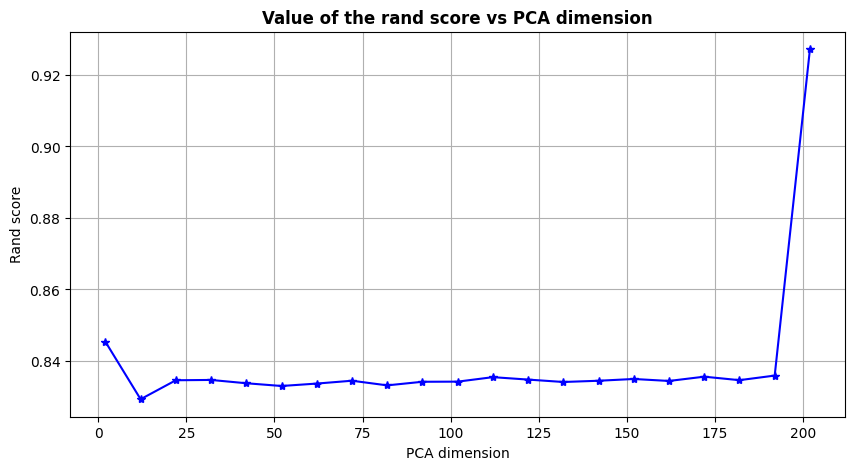

In [6]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, training_rand_scores)

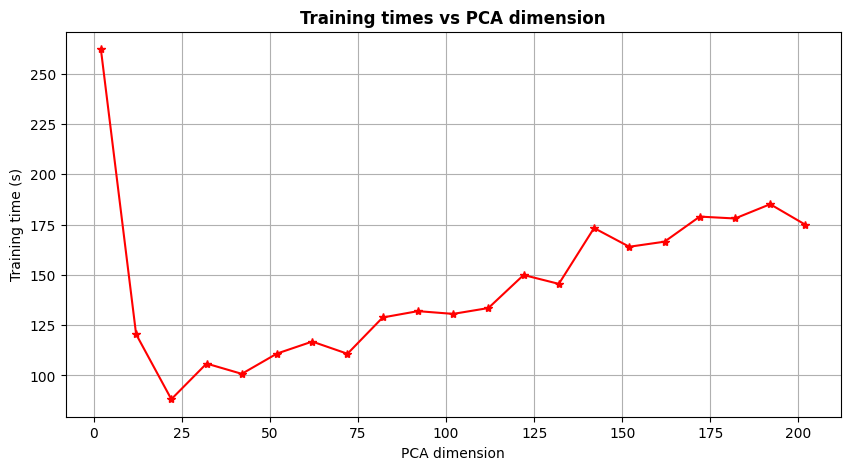

In [7]:
plot_training_time_vs_PCA(pca_dimensions, training_times)

In [8]:
best_estimators = get_best_estimators(normalized_cut)

In [9]:
testing_results = execute_estimators(best_estimators, "NormalizedCut", 200, 0.5)
testing_results

Executing NormalizedCut ..: 100%|██████████| 21/21 [10:42<00:00, 30.58s/it]


{2: (0.8451209356438675,
  73.982666015625,
  15,
  array([10, 13,  6, ...,  8,  5,  6])),
 12: (0.8302039475027044,
  24.707294940948486,
  15,
  array([11,  0,  7, ...,  5,  4,  8])),
 22: (0.8323442124385116,
  28.517786026000977,
  15,
  array([ 0, 12, 12, ..., 10, 12,  2])),
 32: (0.8330403935256057,
  26.86648917198181,
  15,
  array([ 0,  5, 12, ...,  8, 10,  4])),
 42: (0.8330179005164003,
  24.448095321655273,
  15,
  array([ 0, 12,  1, ...,  4,  7, 10])),
 52: (0.8379975098483456,
  27.133306980133057,
  15,
  array([10, 10,  8, ..., 14,  8, 13])),
 62: (0.8321356112097646,
  35.78901672363281,
  15,
  array([ 0, 13,  5, ..., 12,  6,  7])),
 72: (0.8328188924948462,
  44.03323268890381,
  15,
  array([12,  4,  7, ...,  2,  9,  2])),
 82: (0.837235319331333,
  28.424210786819458,
  15,
  array([ 9,  2,  0, ..., 11, 12,  9])),
 92: (0.8343651542057029,
  30.65106201171875,
  15,
  array([ 6,  5, 14, ...,  7,  5,  7])),
 102: (0.8333713387626804,
  24.91676425933838,
  15,
  arr

In [10]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.8451209356438675,
 0.8302039475027044,
 0.8323442124385116,
 0.8330403935256057,
 0.8330179005164003,
 0.8379975098483456,
 0.8321356112097646,
 0.8328188924948462,
 0.837235319331333,
 0.8343651542057029,
 0.8333713387626804,
 0.8348427734574327,
 0.8358131569816096,
 0.8356240687445146,
 0.8354388177902966,
 0.8322857551078725,
 0.8357430653358643,
 0.8367516992223378,
 0.8325984936623599,
 0.833209683015941,
 0.9298701855367093]

In [11]:
testing_times = get_testing_times(testing_results)
testing_times

[73.982666015625,
 24.707294940948486,
 28.517786026000977,
 26.86648917198181,
 24.448095321655273,
 27.133306980133057,
 35.78901672363281,
 44.03323268890381,
 28.424210786819458,
 30.65106201171875,
 24.91676425933838,
 30.99610710144043,
 22.863135814666748,
 29.709940195083618,
 24.074711084365845,
 24.10280203819275,
 27.36990213394165,
 35.48173189163208,
 25.763673067092896,
 26.844601154327393,
 25.284838914871216]

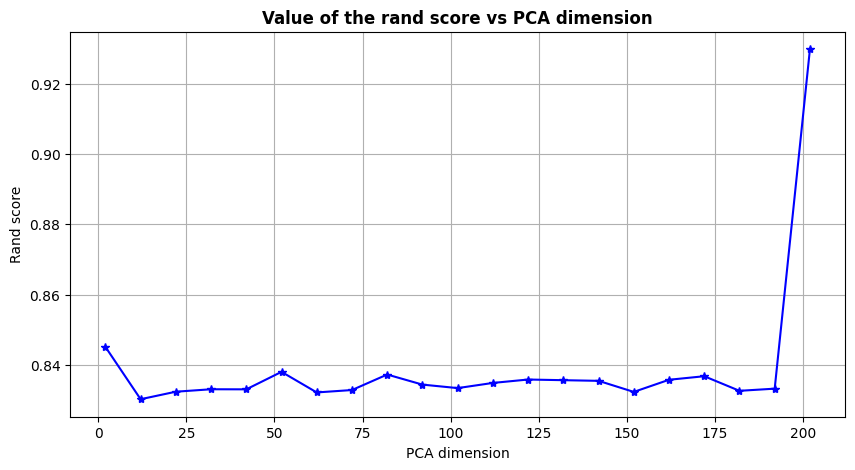

In [12]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, testing_rand_scores)

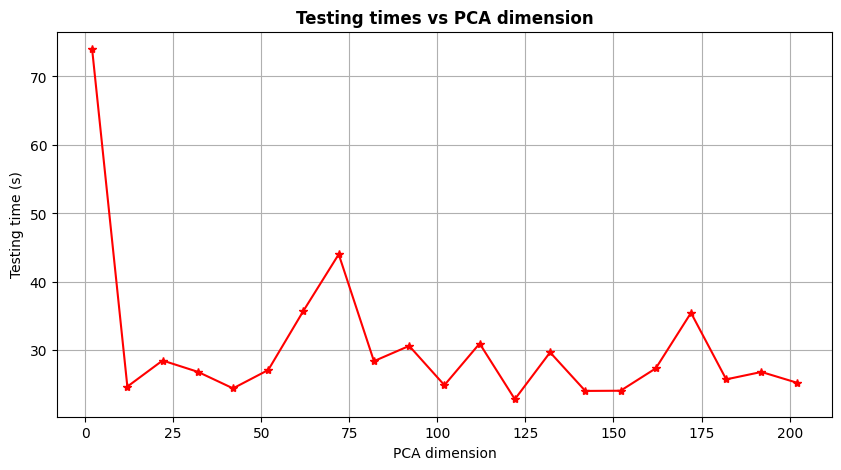

In [13]:
plot_testing_time_vs_PCA(pca_dimensions, testing_times)

In [14]:
labels = get_labels(testing_results)
labels

[array([10, 13,  6, ...,  8,  5,  6]),
 array([11,  0,  7, ...,  5,  4,  8]),
 array([ 0, 12, 12, ..., 10, 12,  2]),
 array([ 0,  5, 12, ...,  8, 10,  4]),
 array([ 0, 12,  1, ...,  4,  7, 10]),
 array([10, 10,  8, ..., 14,  8, 13]),
 array([ 0, 13,  5, ..., 12,  6,  7]),
 array([12,  4,  7, ...,  2,  9,  2]),
 array([ 9,  2,  0, ..., 11, 12,  9]),
 array([ 6,  5, 14, ...,  7,  5,  7]),
 array([ 1,  6,  1, ...,  8,  3, 10]),
 array([0, 6, 3, ..., 3, 3, 2]),
 array([12, 10,  6, ...,  1,  9,  0]),
 array([ 1, 12,  1, ...,  1,  9,  2]),
 array([14,  4, 14, ..., 11, 12, 10]),
 array([6, 0, 5, ..., 3, 0, 5]),
 array([ 2, 13,  4, ...,  1,  9,  0]),
 array([ 7,  7,  0, ...,  1, 14,  0]),
 array([ 3, 11,  2, ...,  1,  8, 13]),
 array([ 8,  3, 12, ..., 12, 12, 13]),
 array([ 1,  0,  5, ..., 10,  0,  2])]

In [15]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 13]

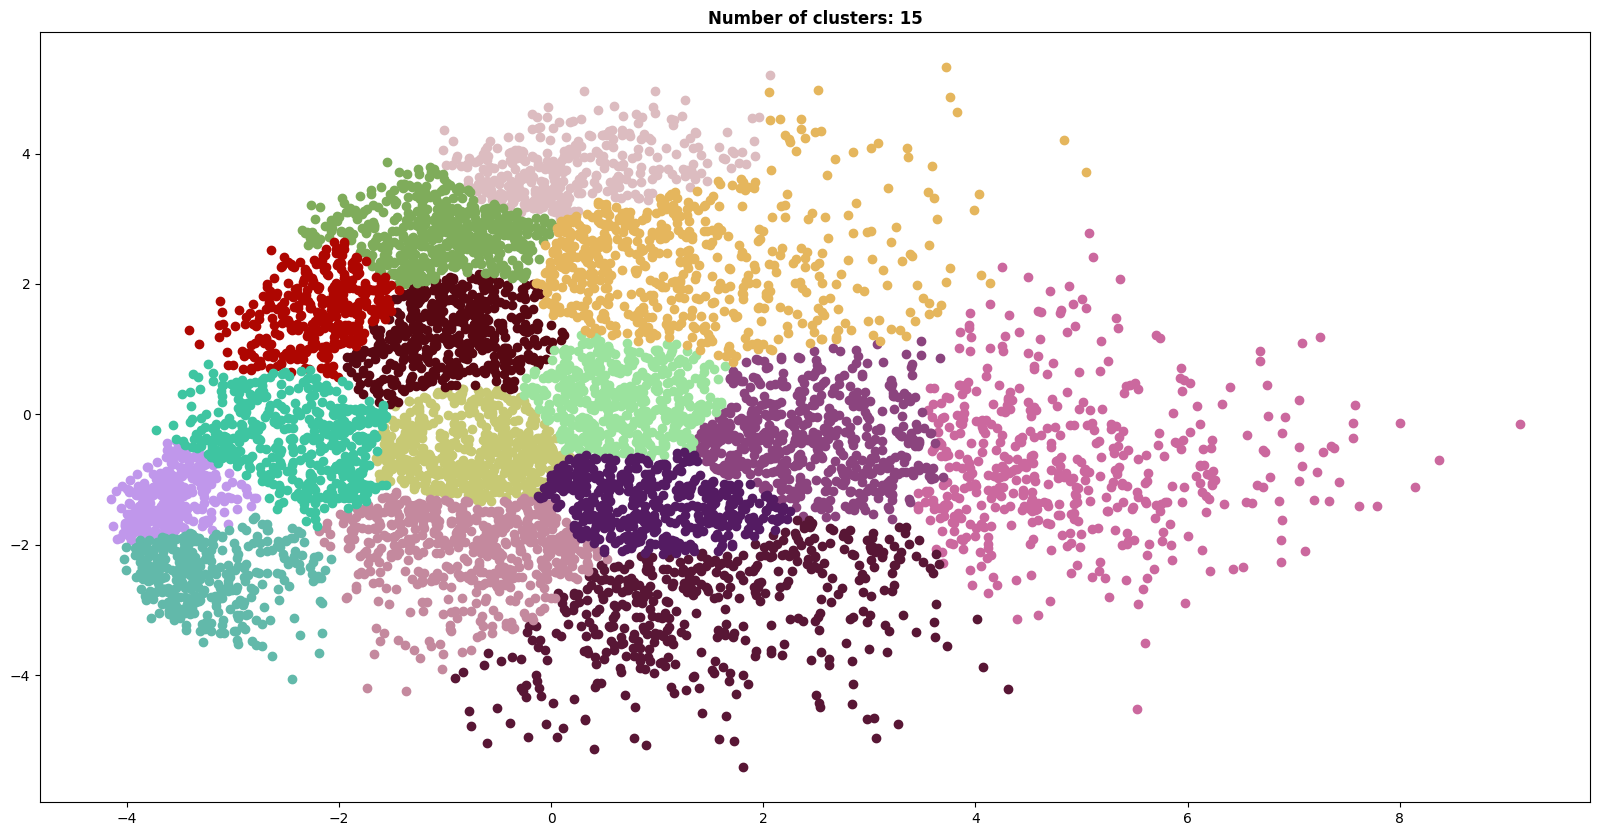

In [16]:
plot_clusters(0.5, n_clusters=n_clusters[0], labels=labels[0])

Loading the PCA testing datasets..: 100%|██████████| 21/21 [00:00<00:00, 117.21it/s]
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs = plt.subplots(n_clusters, 4, figsize = (4*2, n_clusters*2))


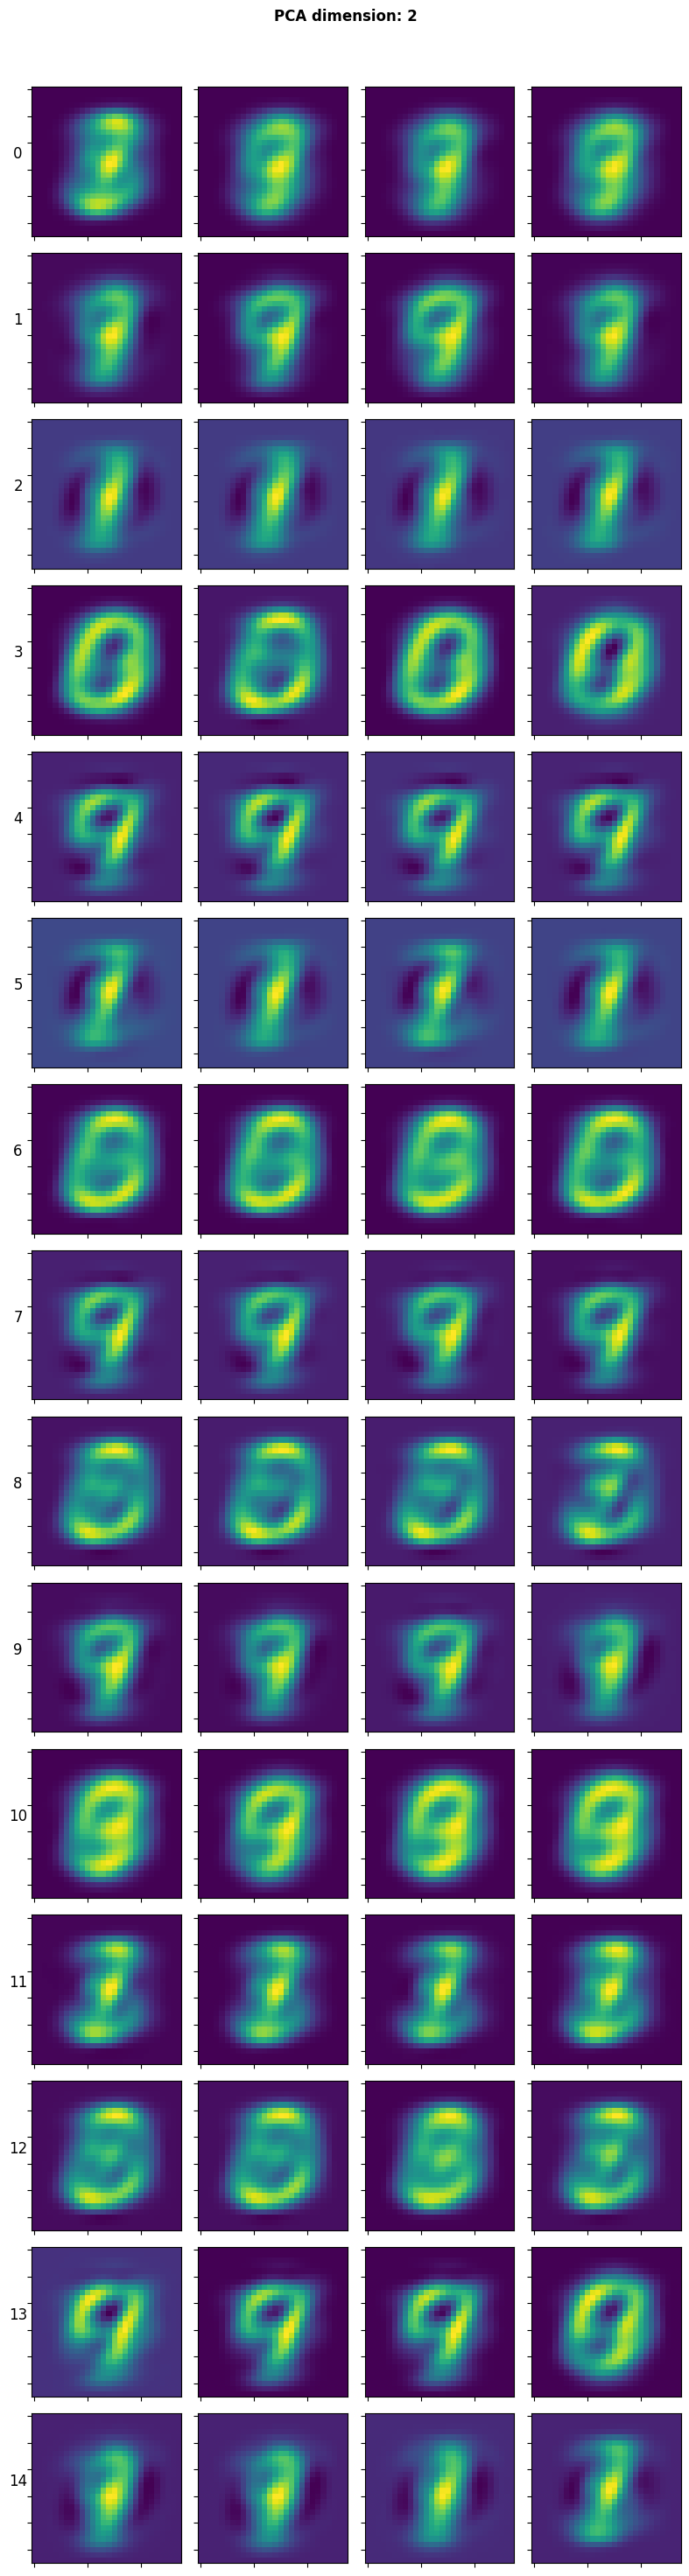

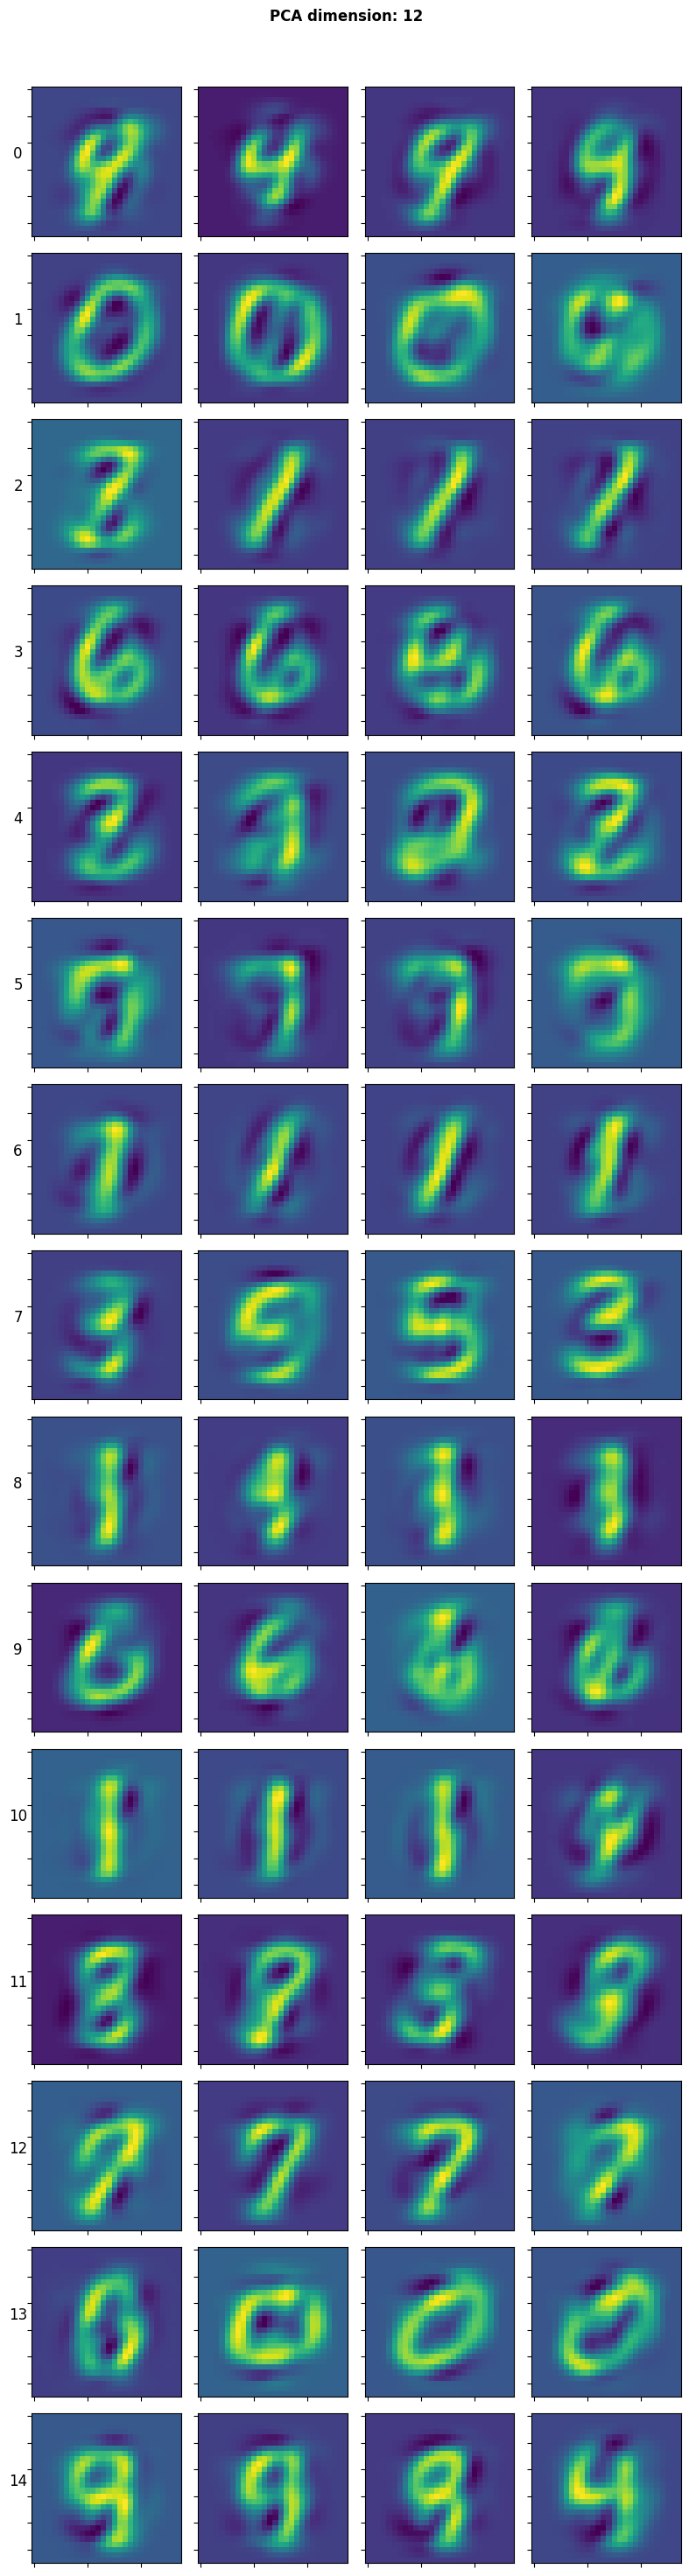

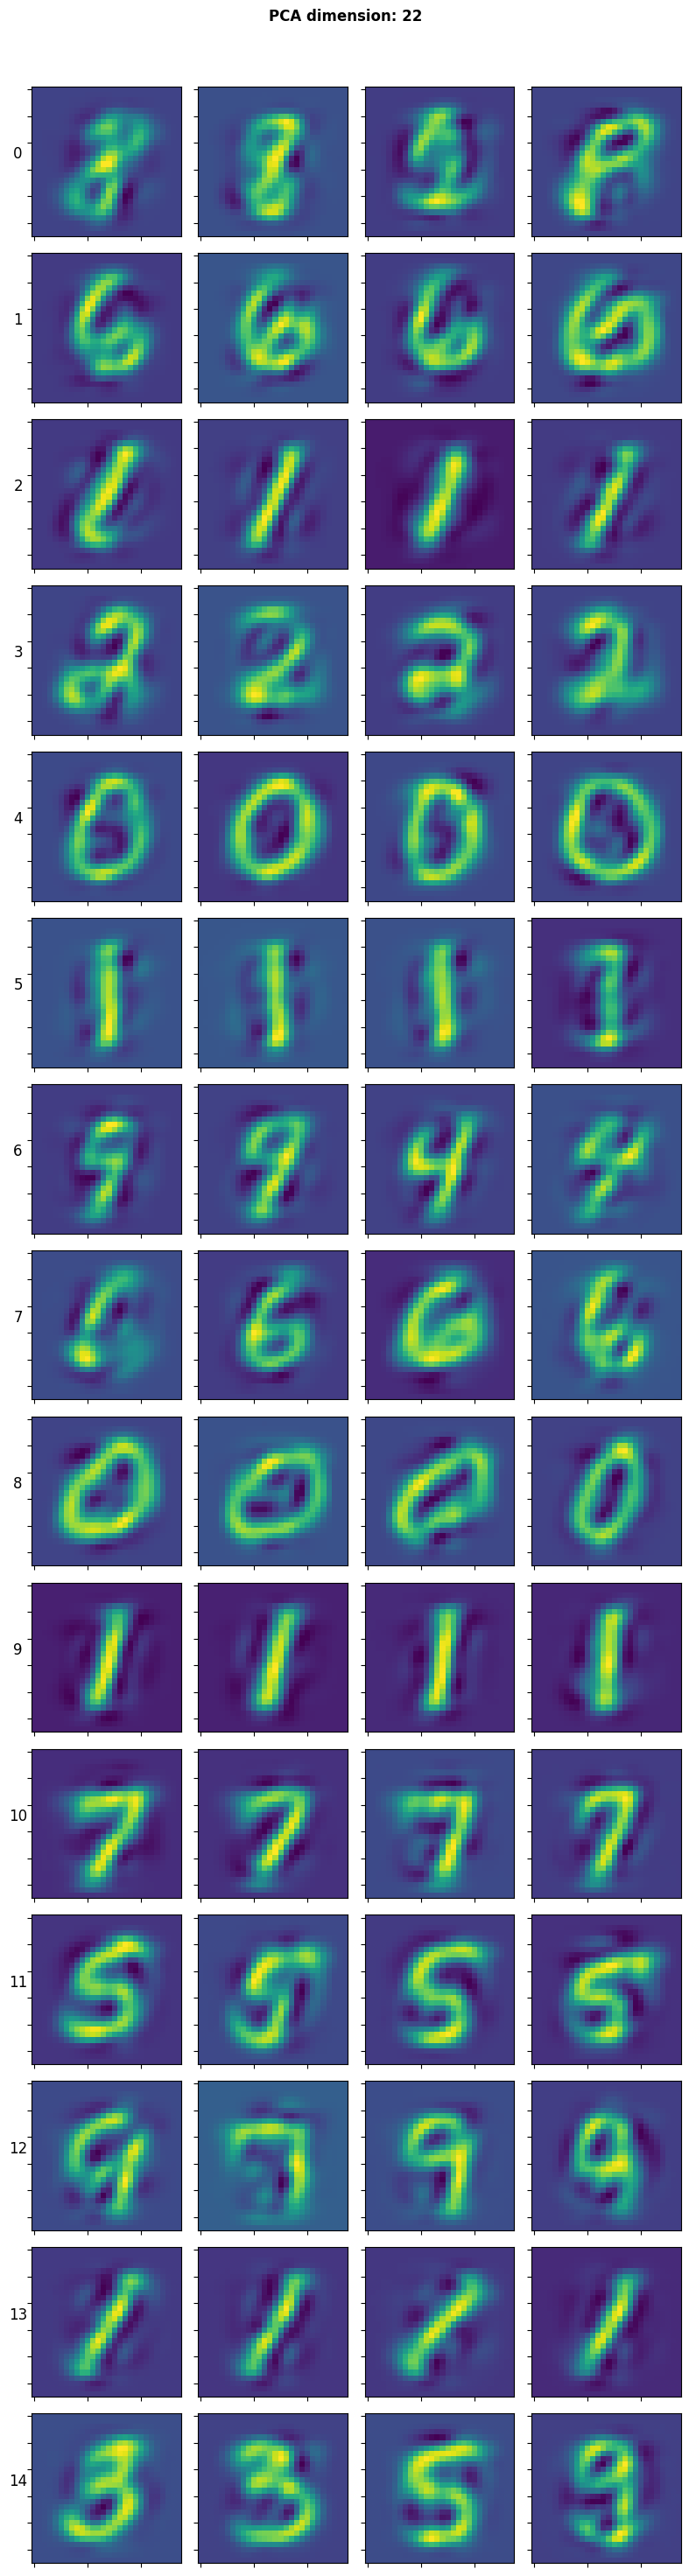

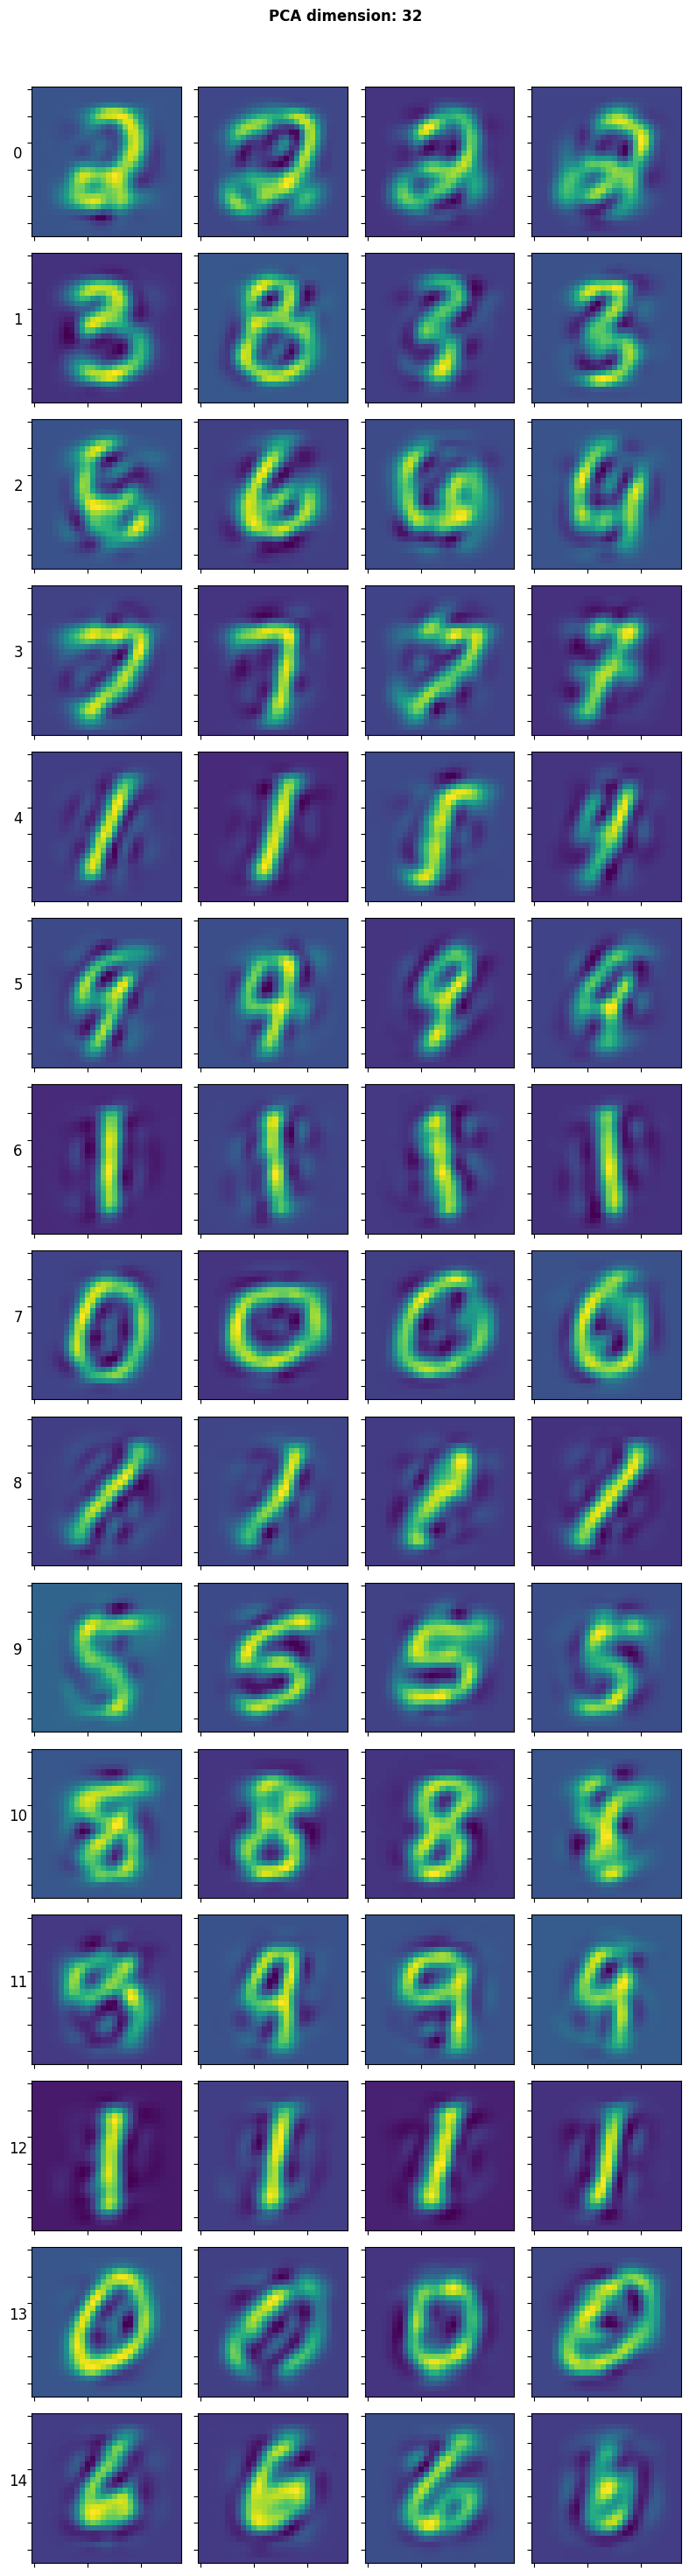

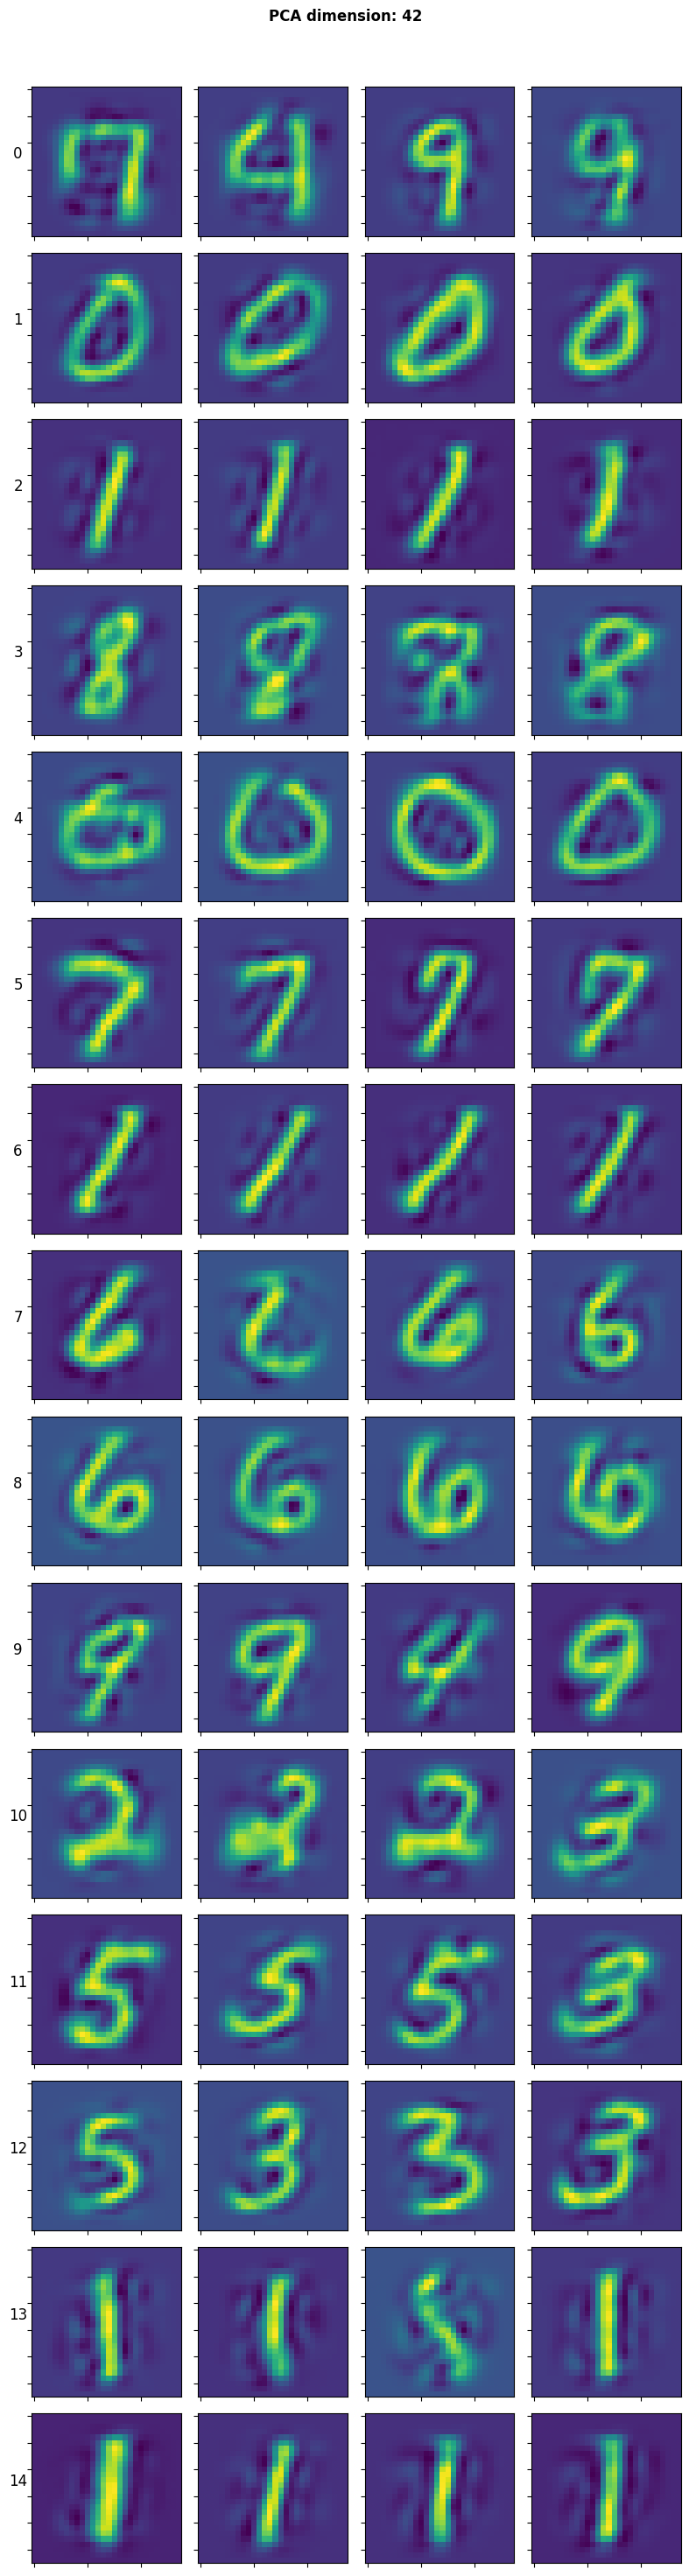

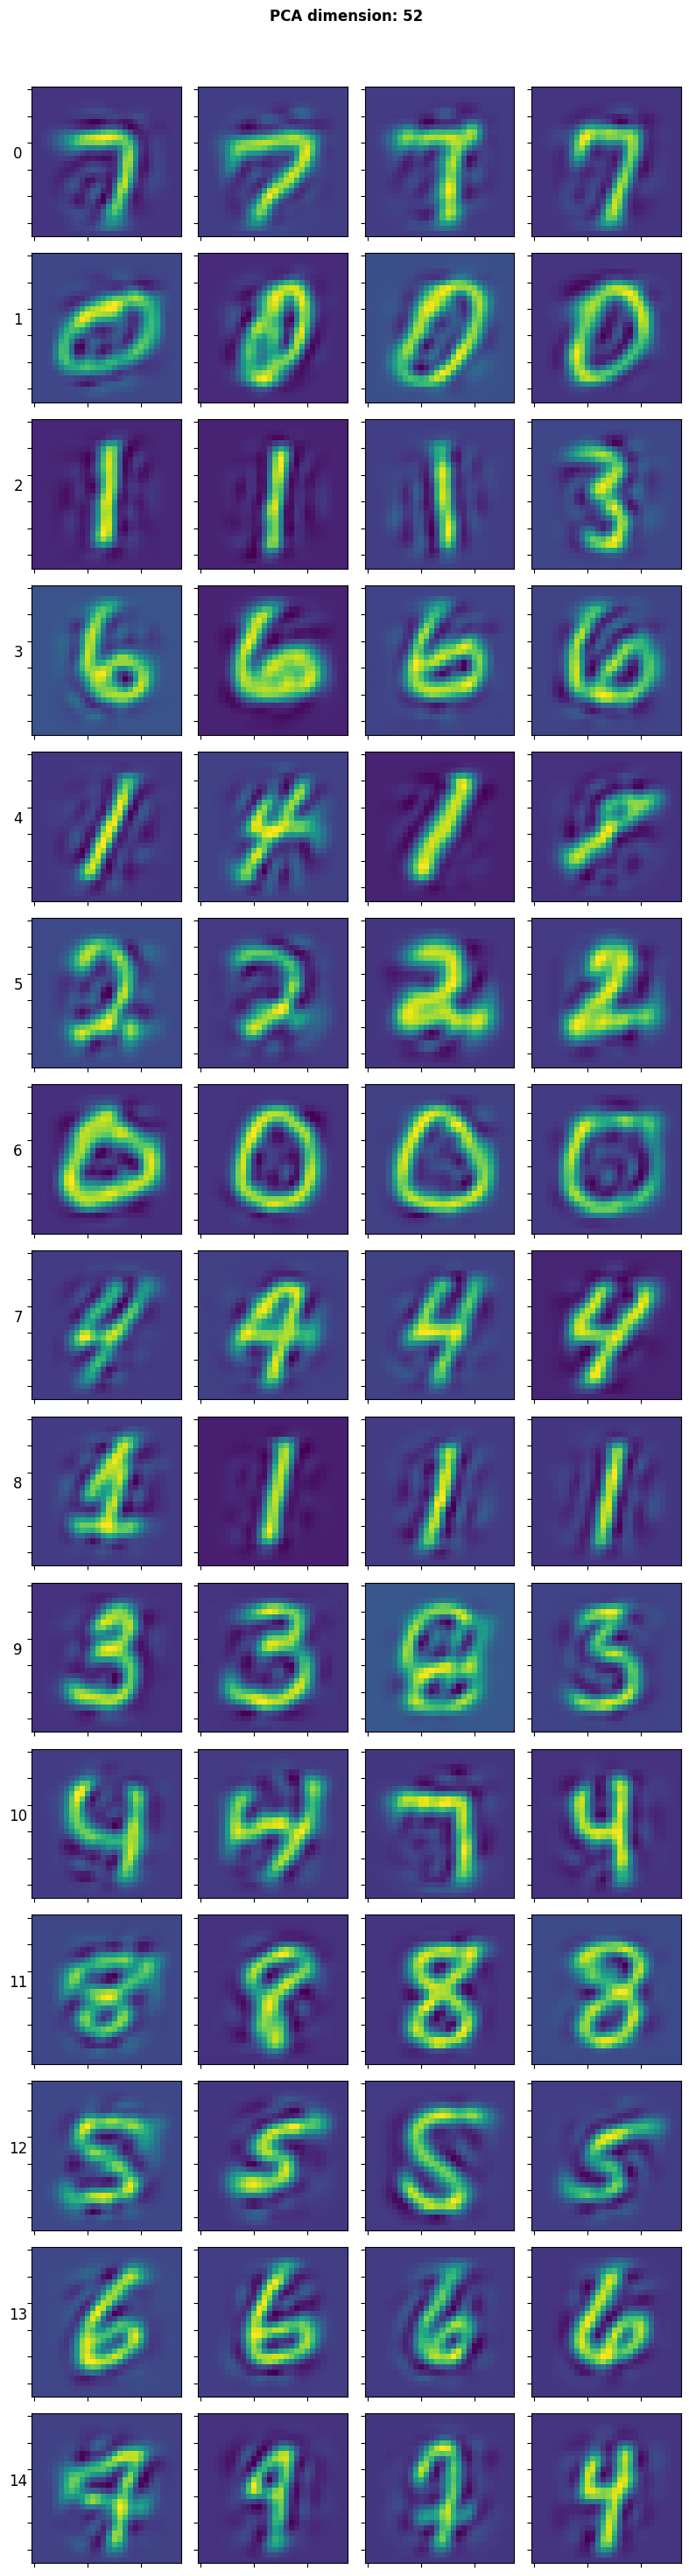

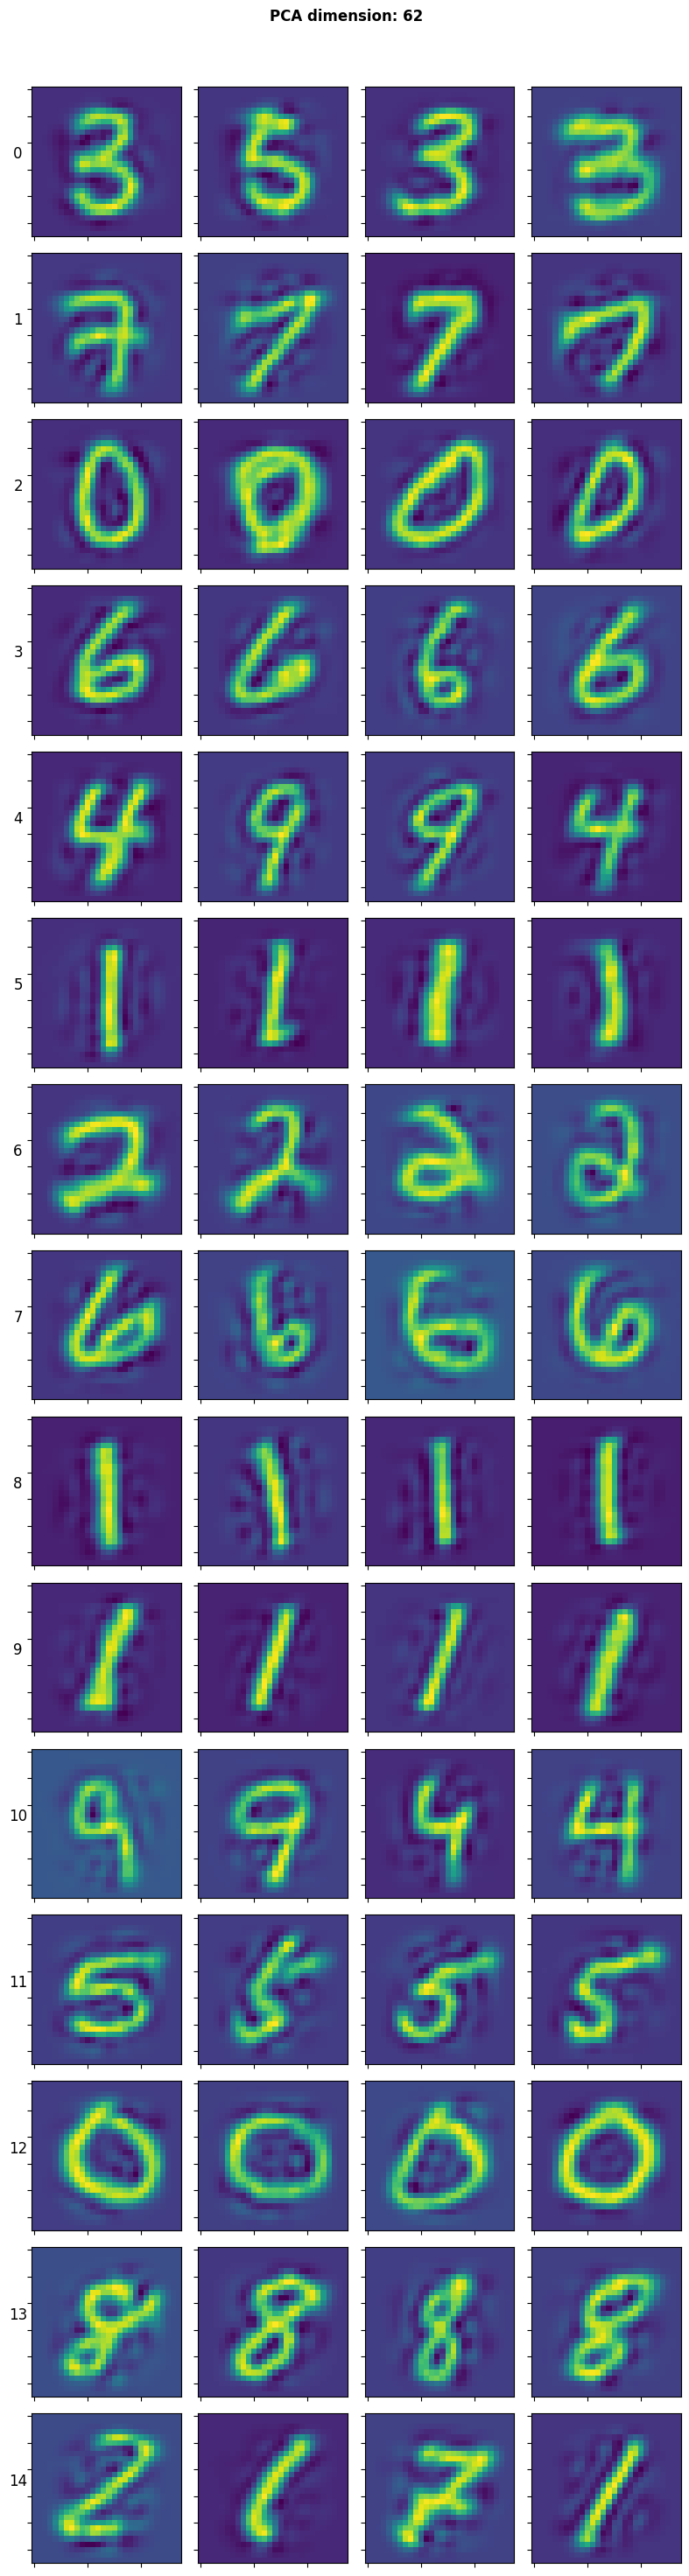

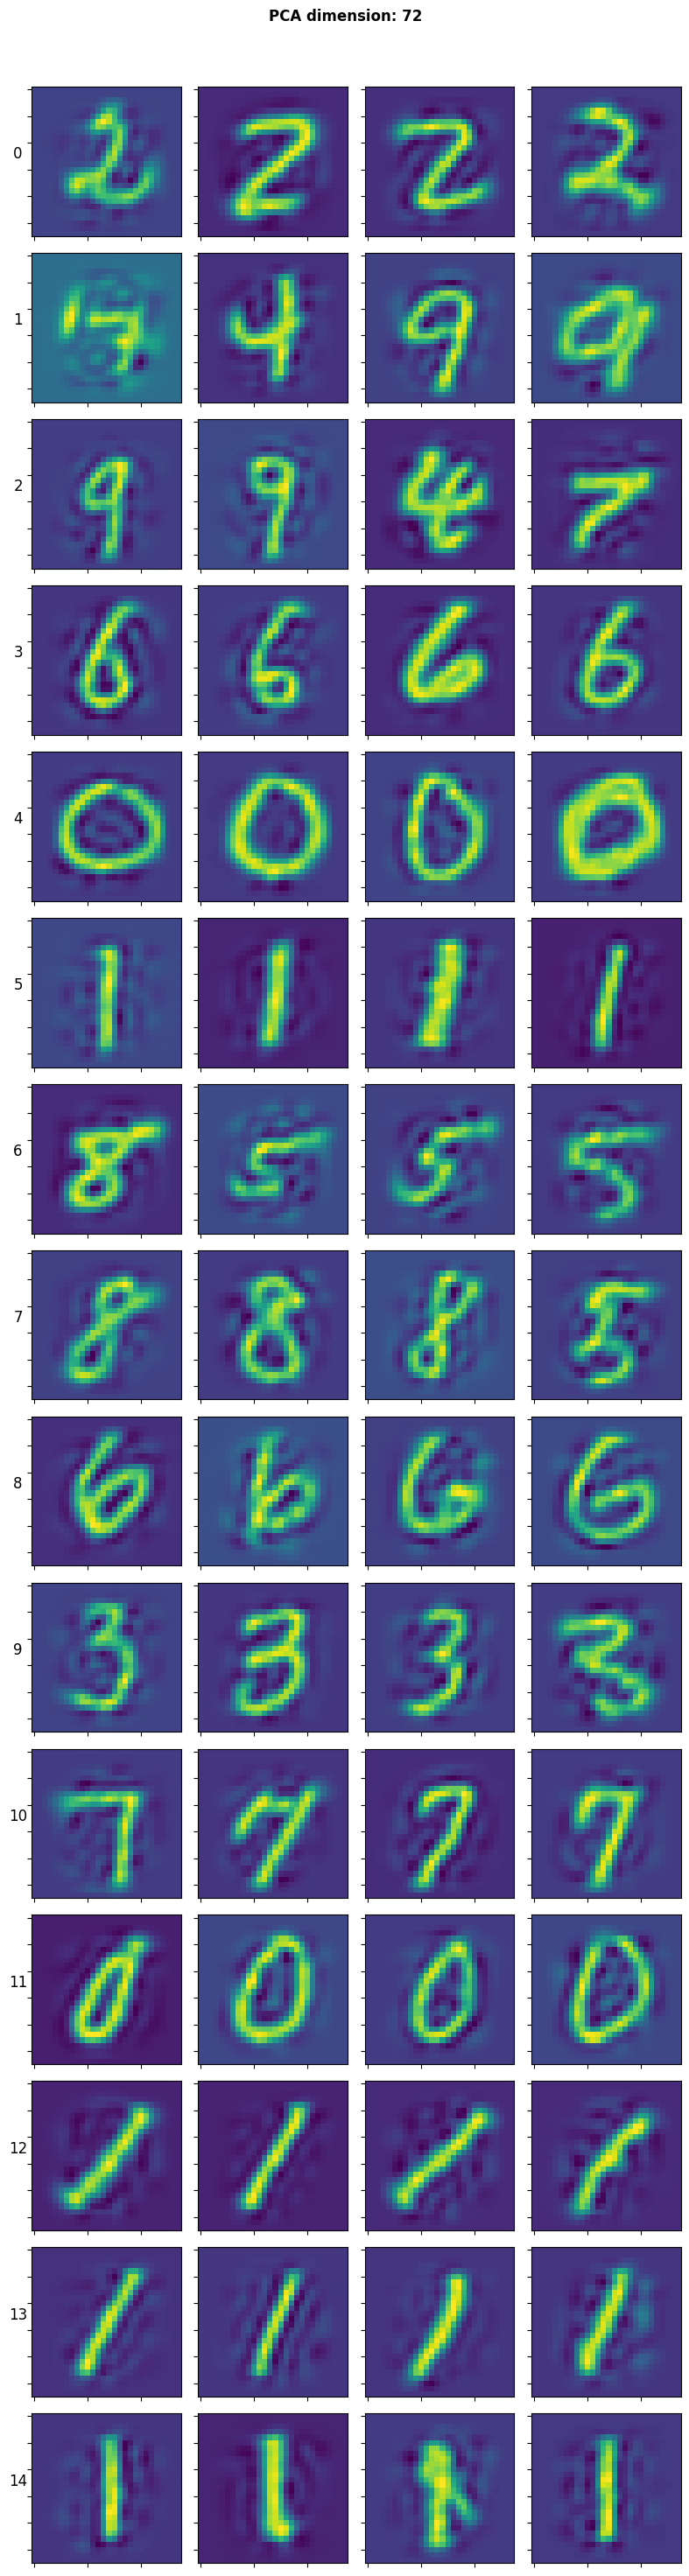

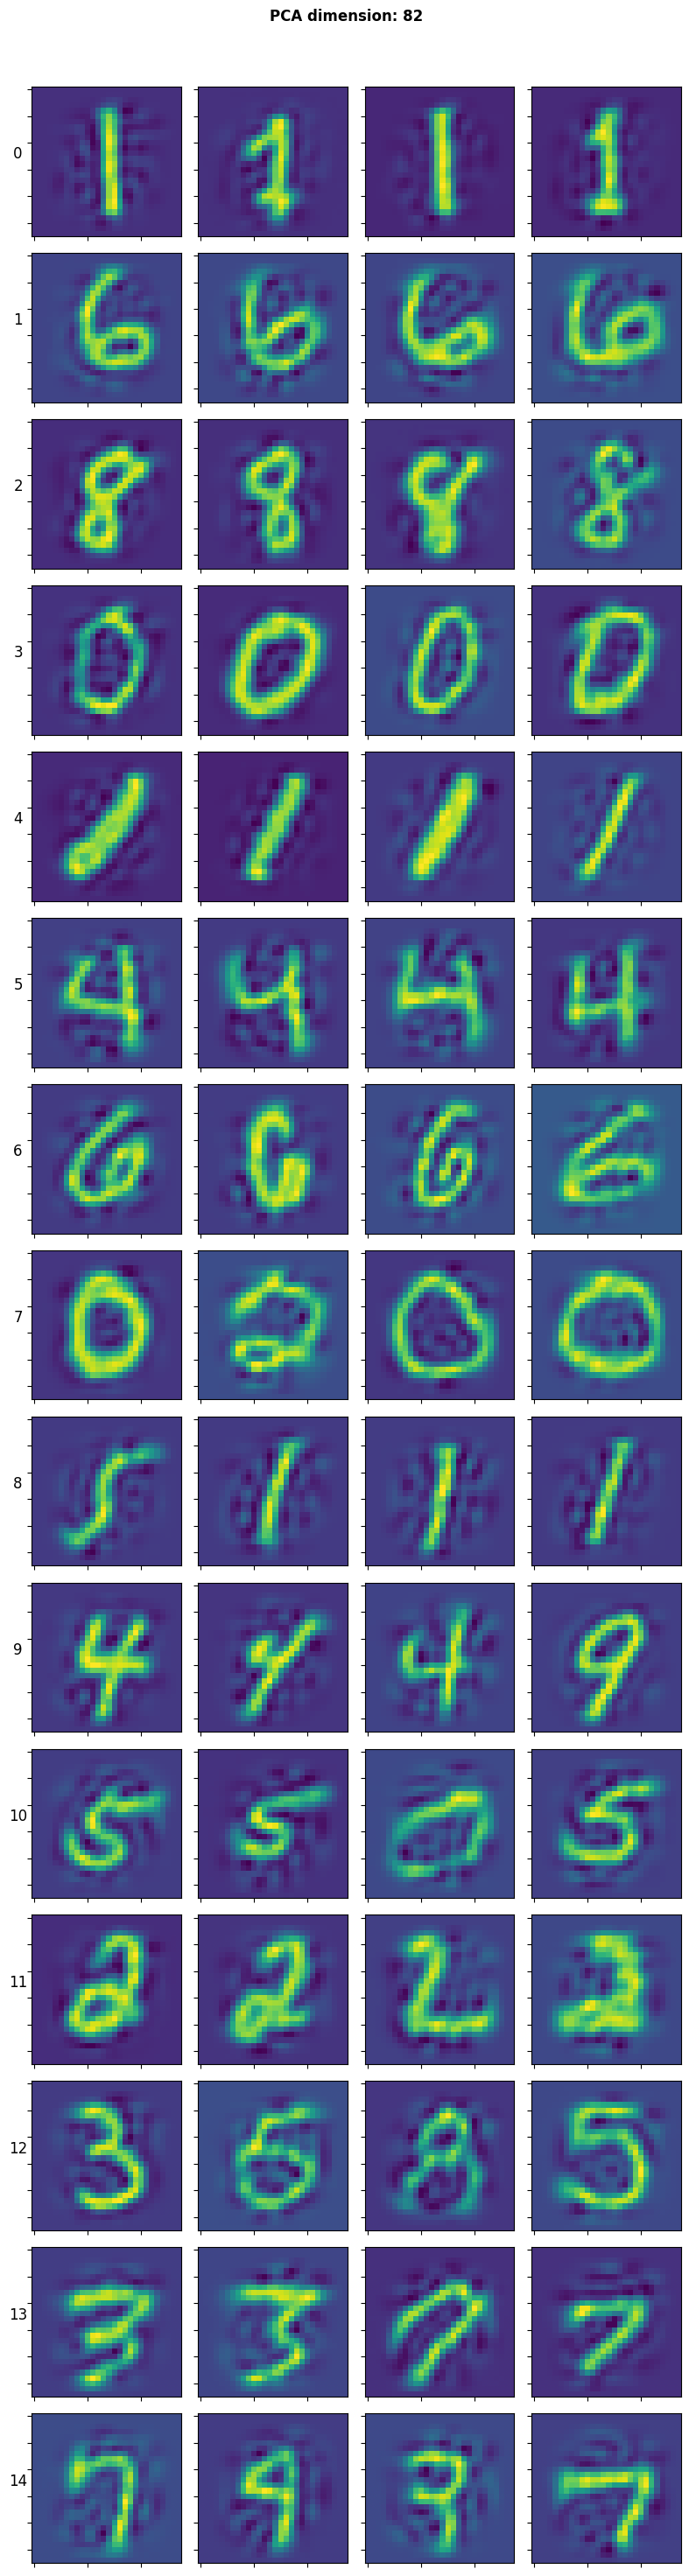

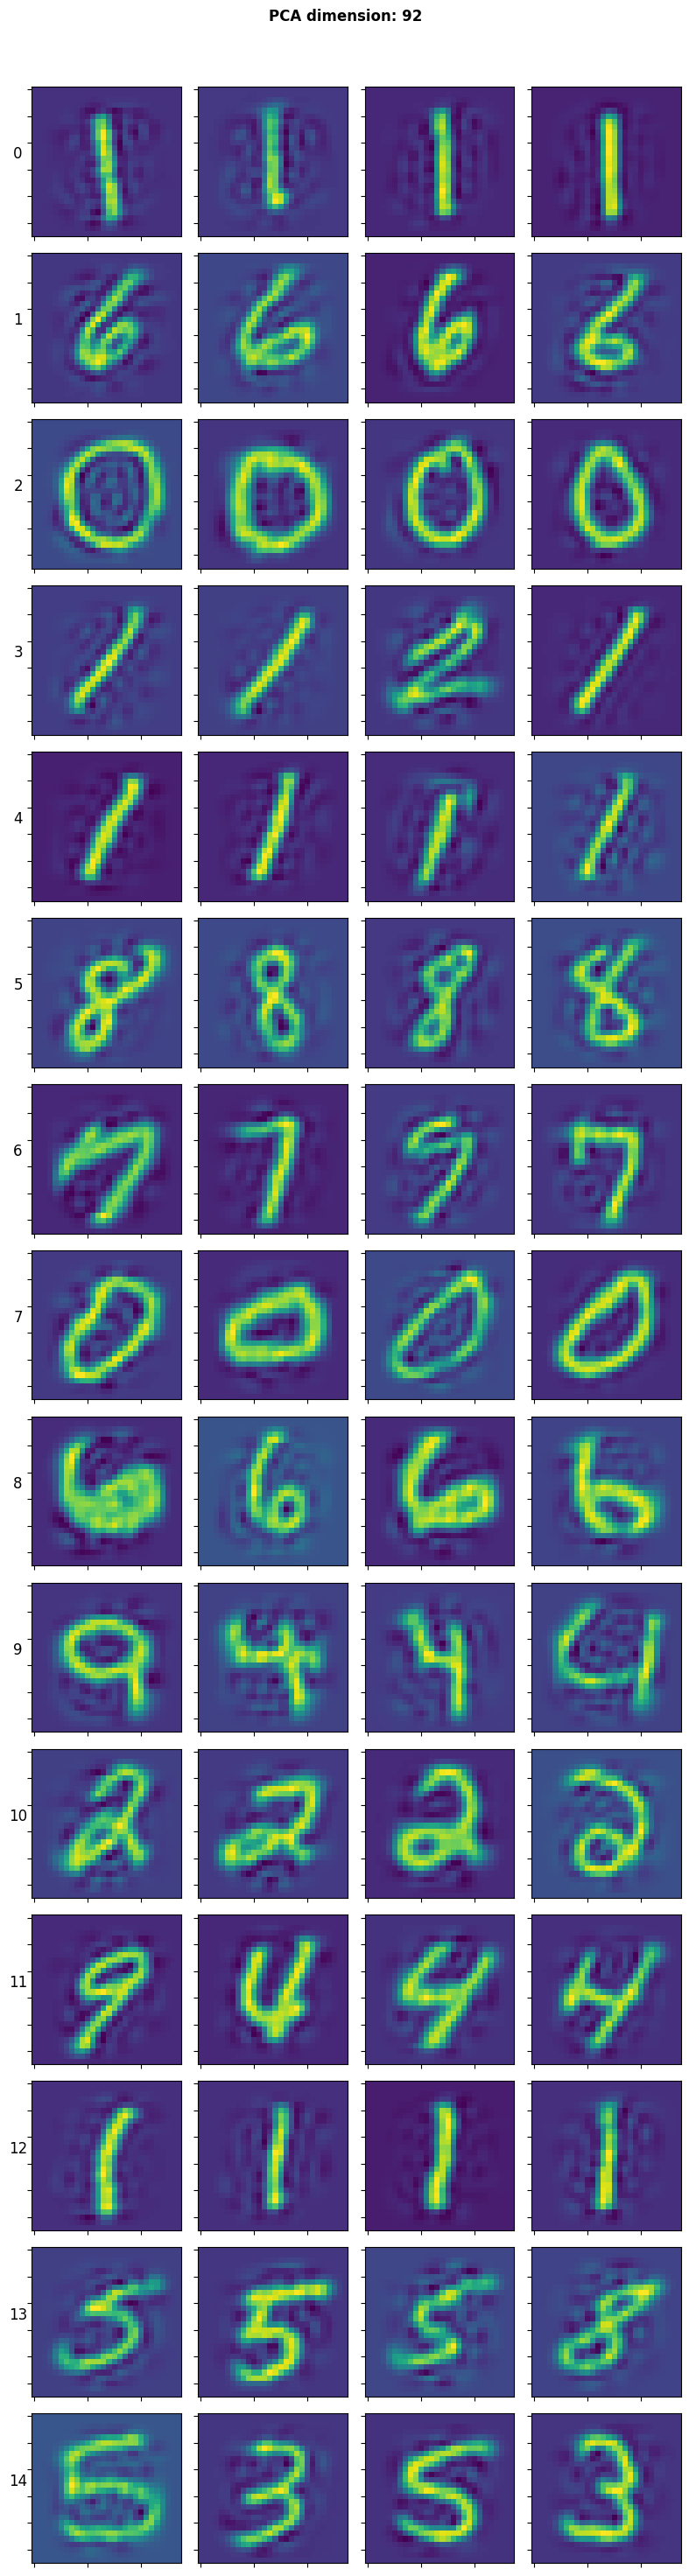

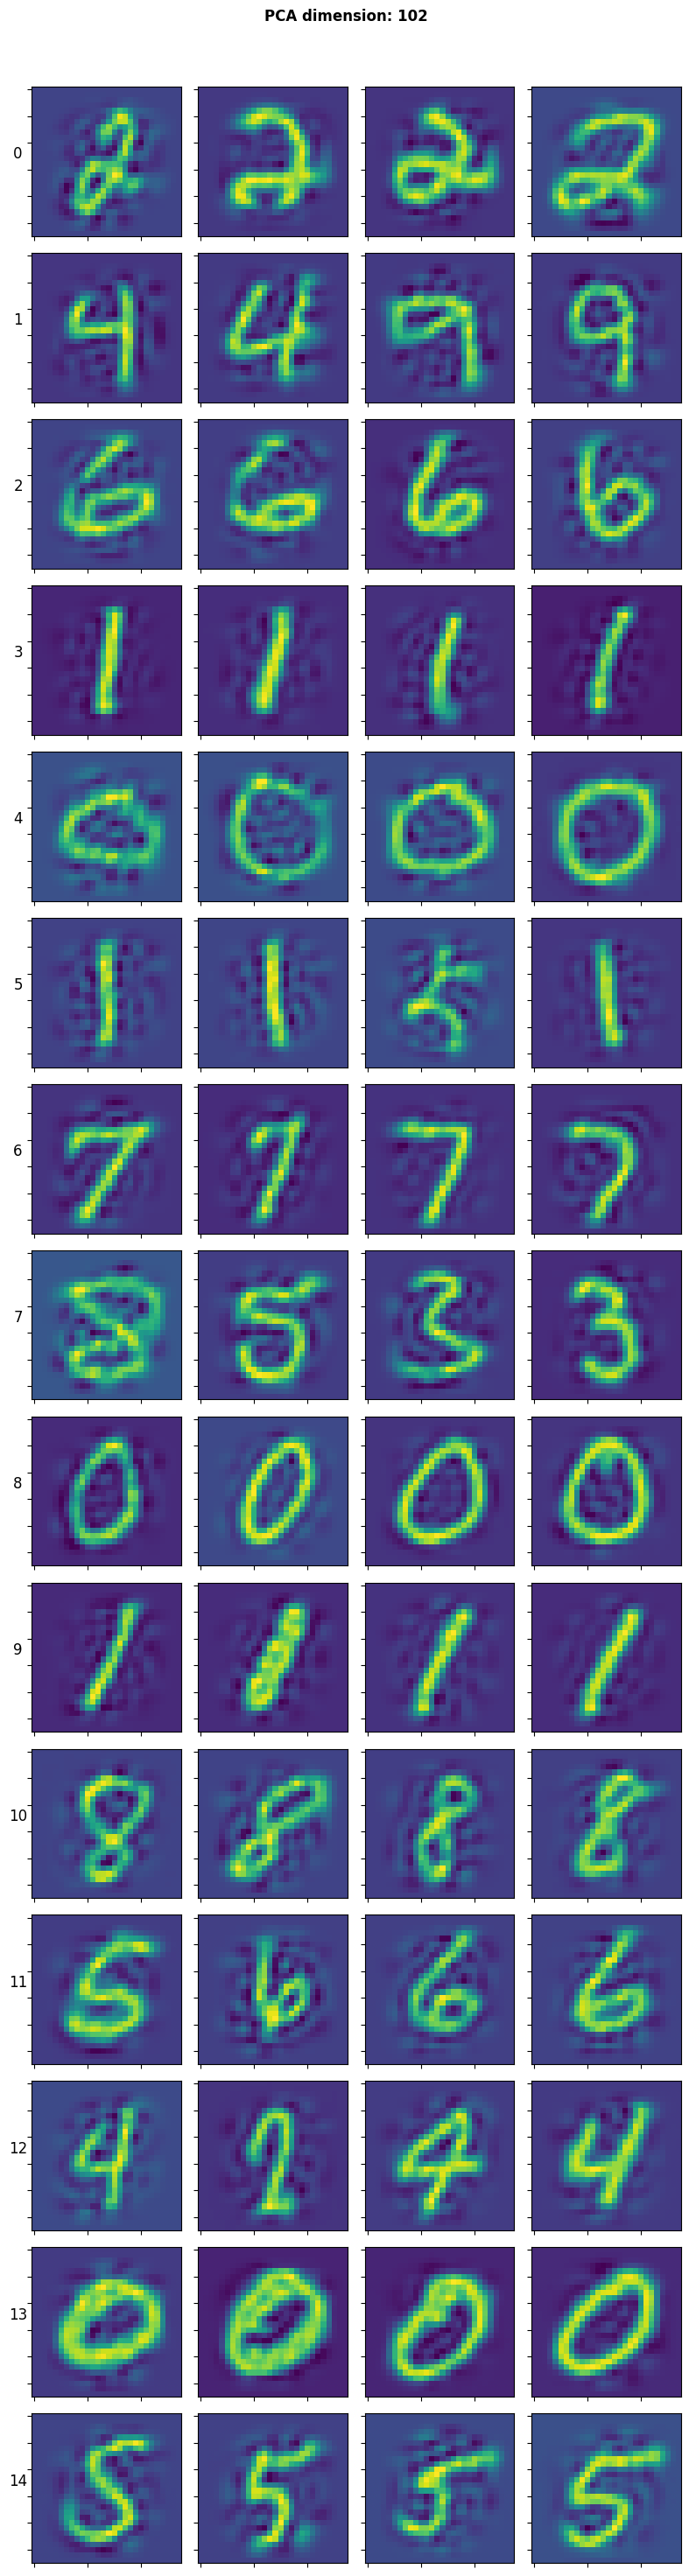

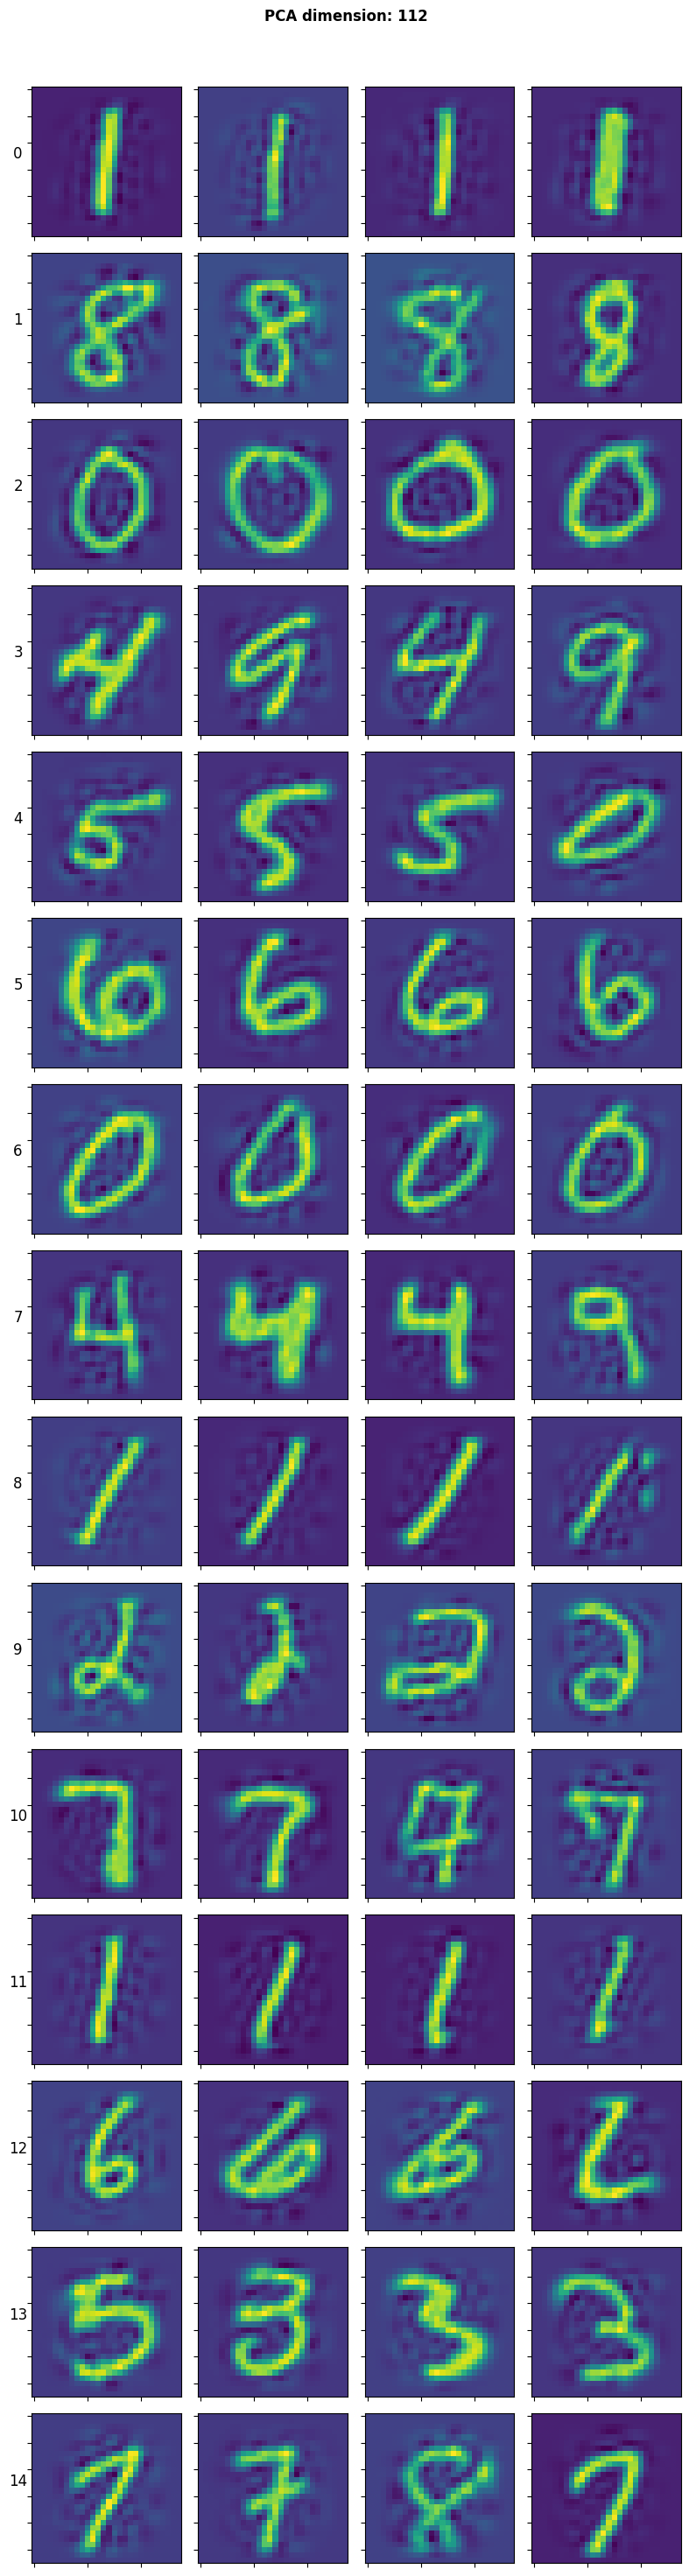

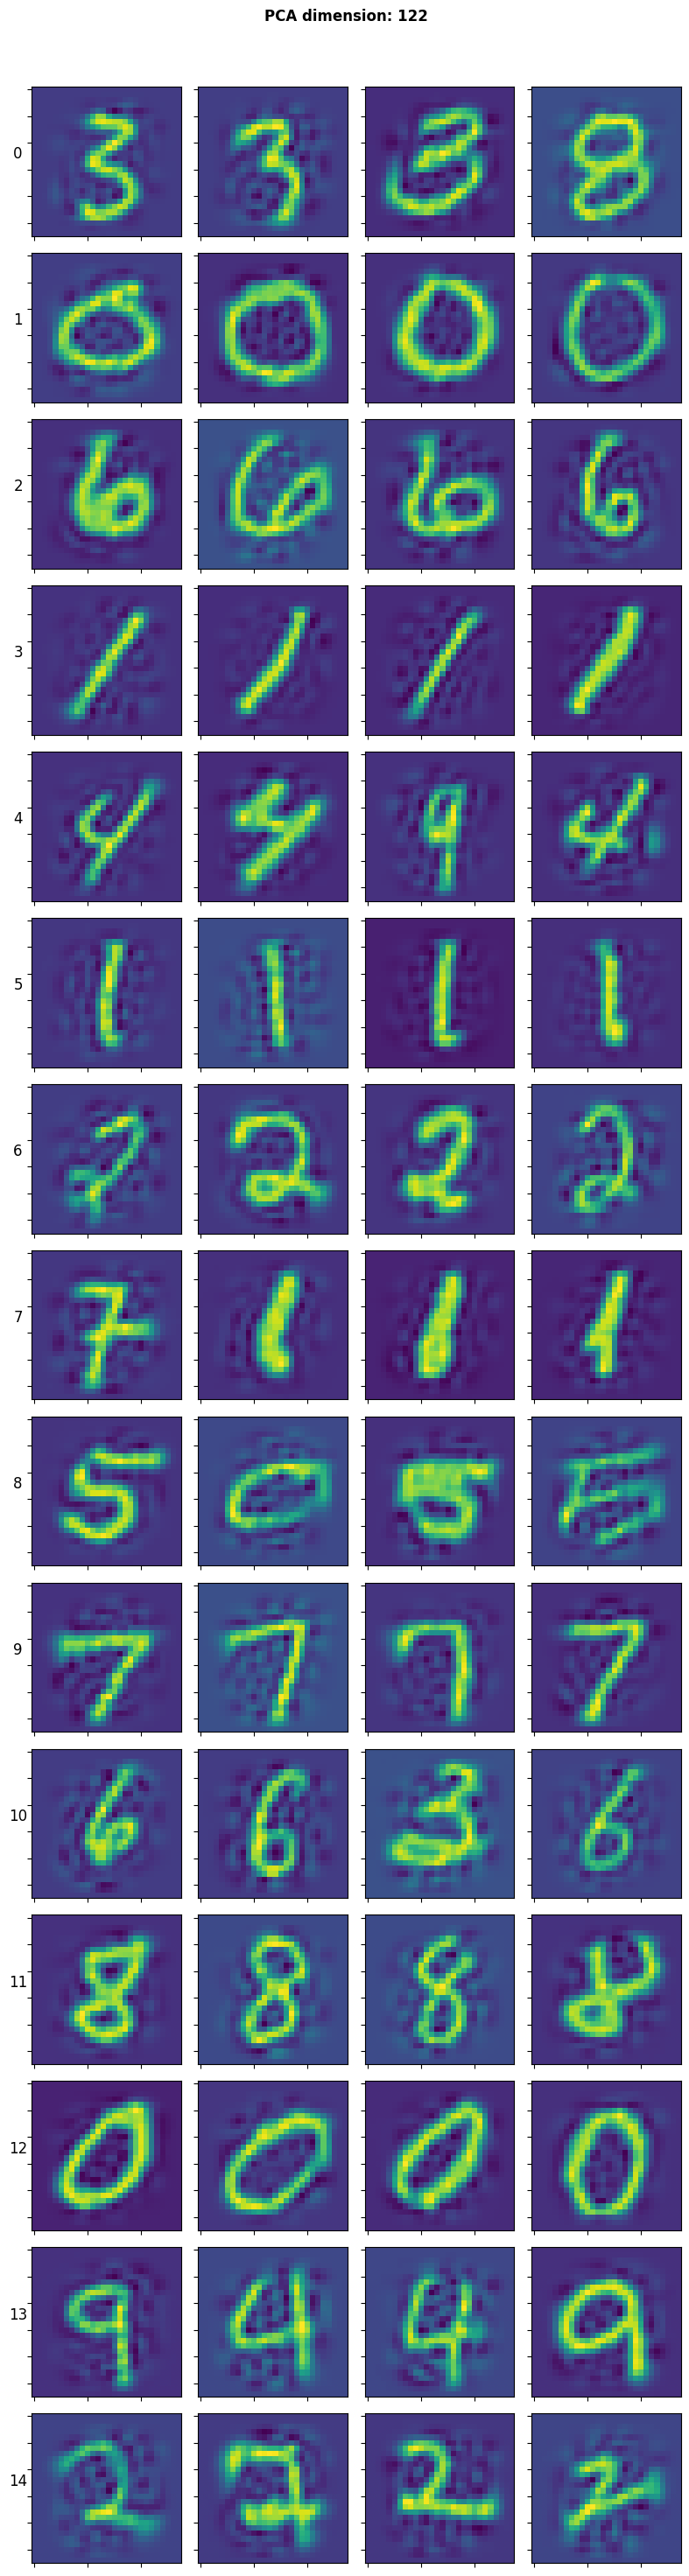

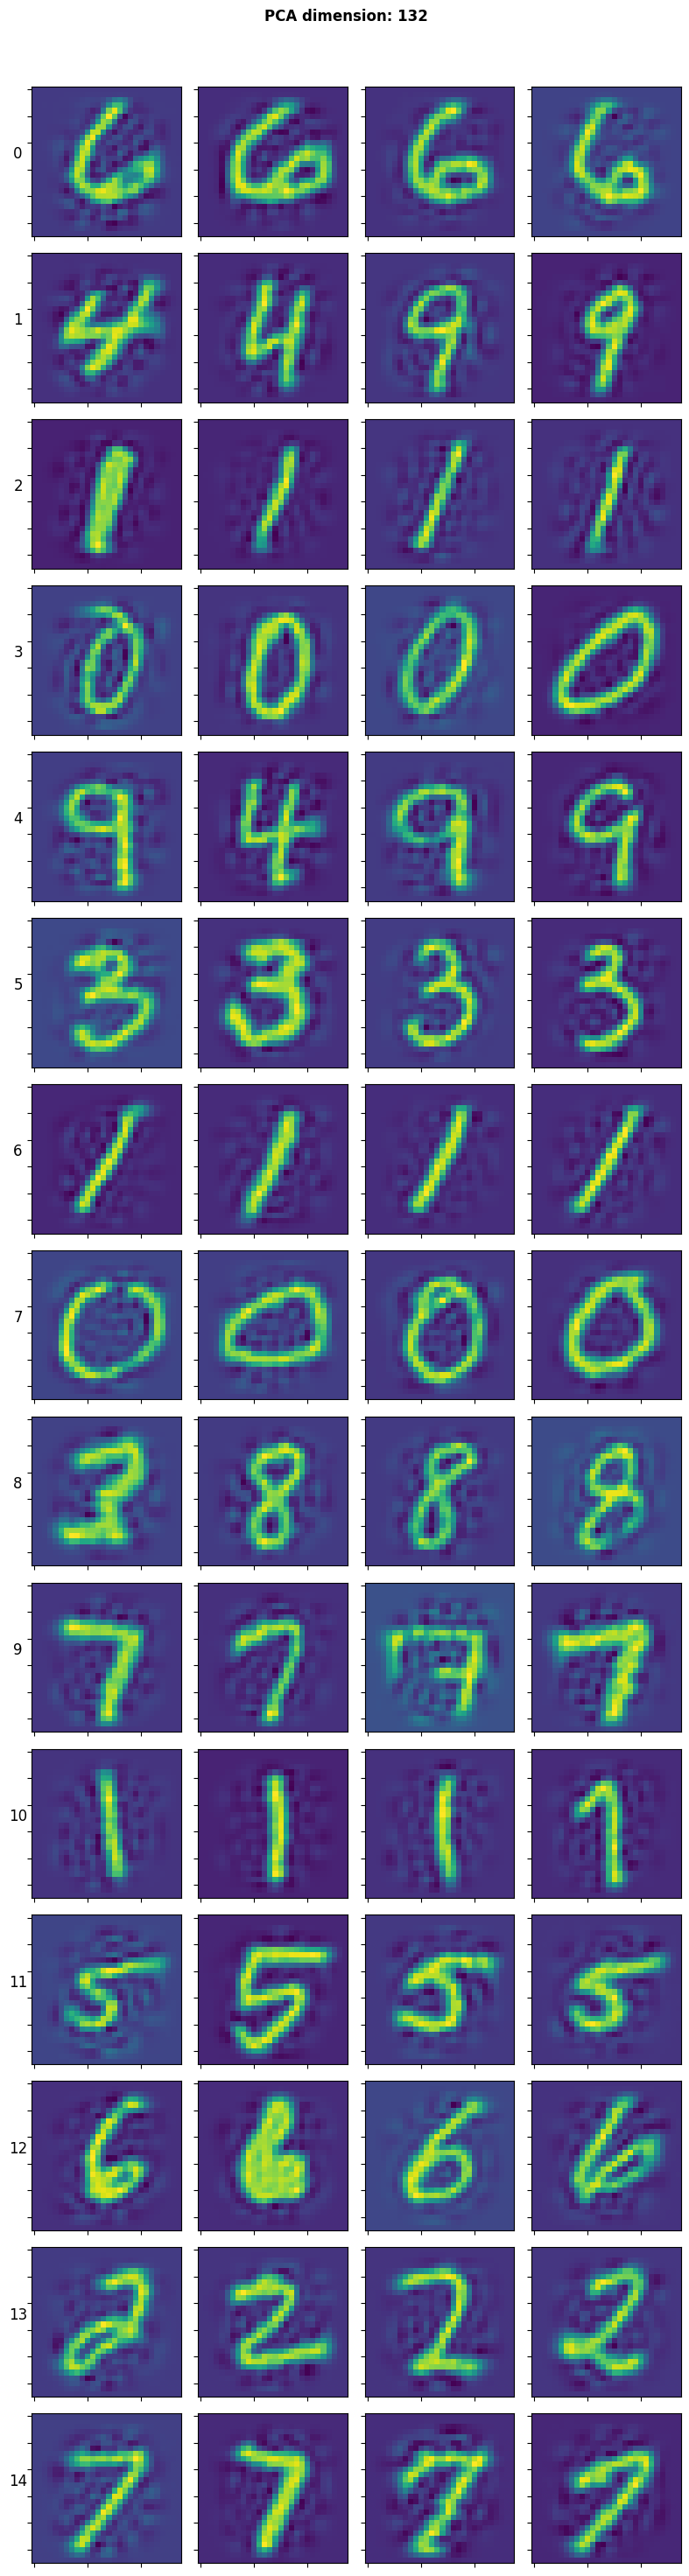

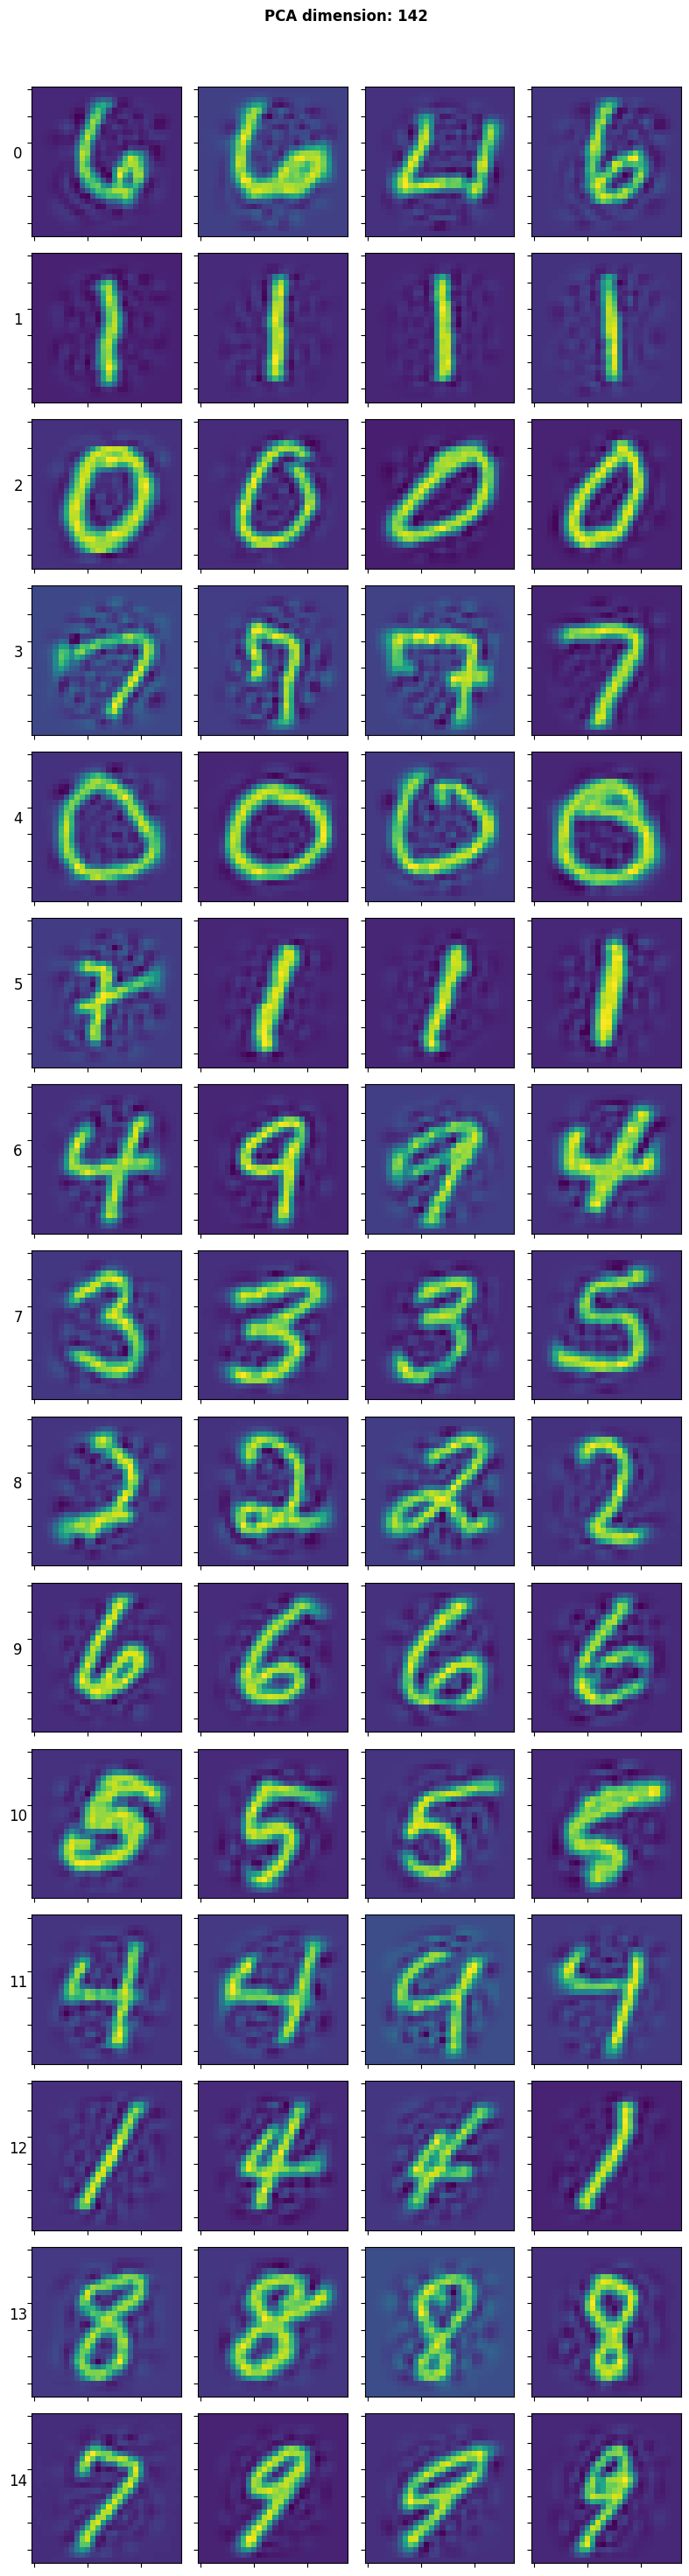

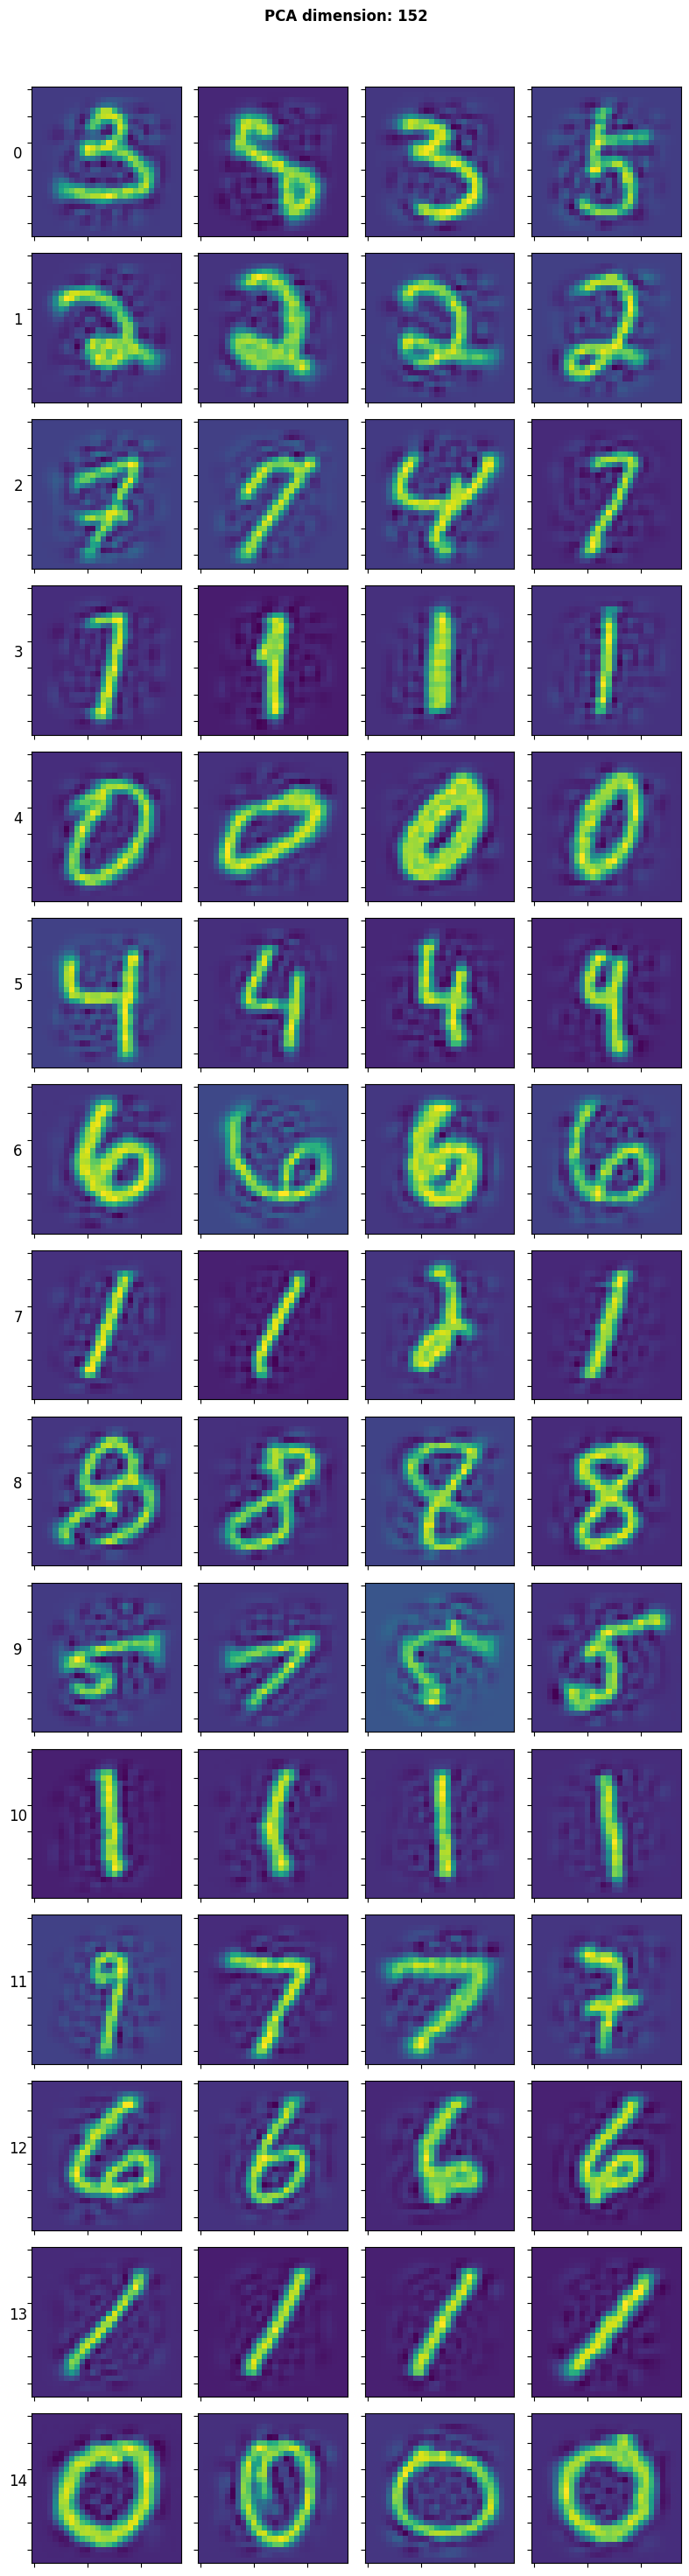

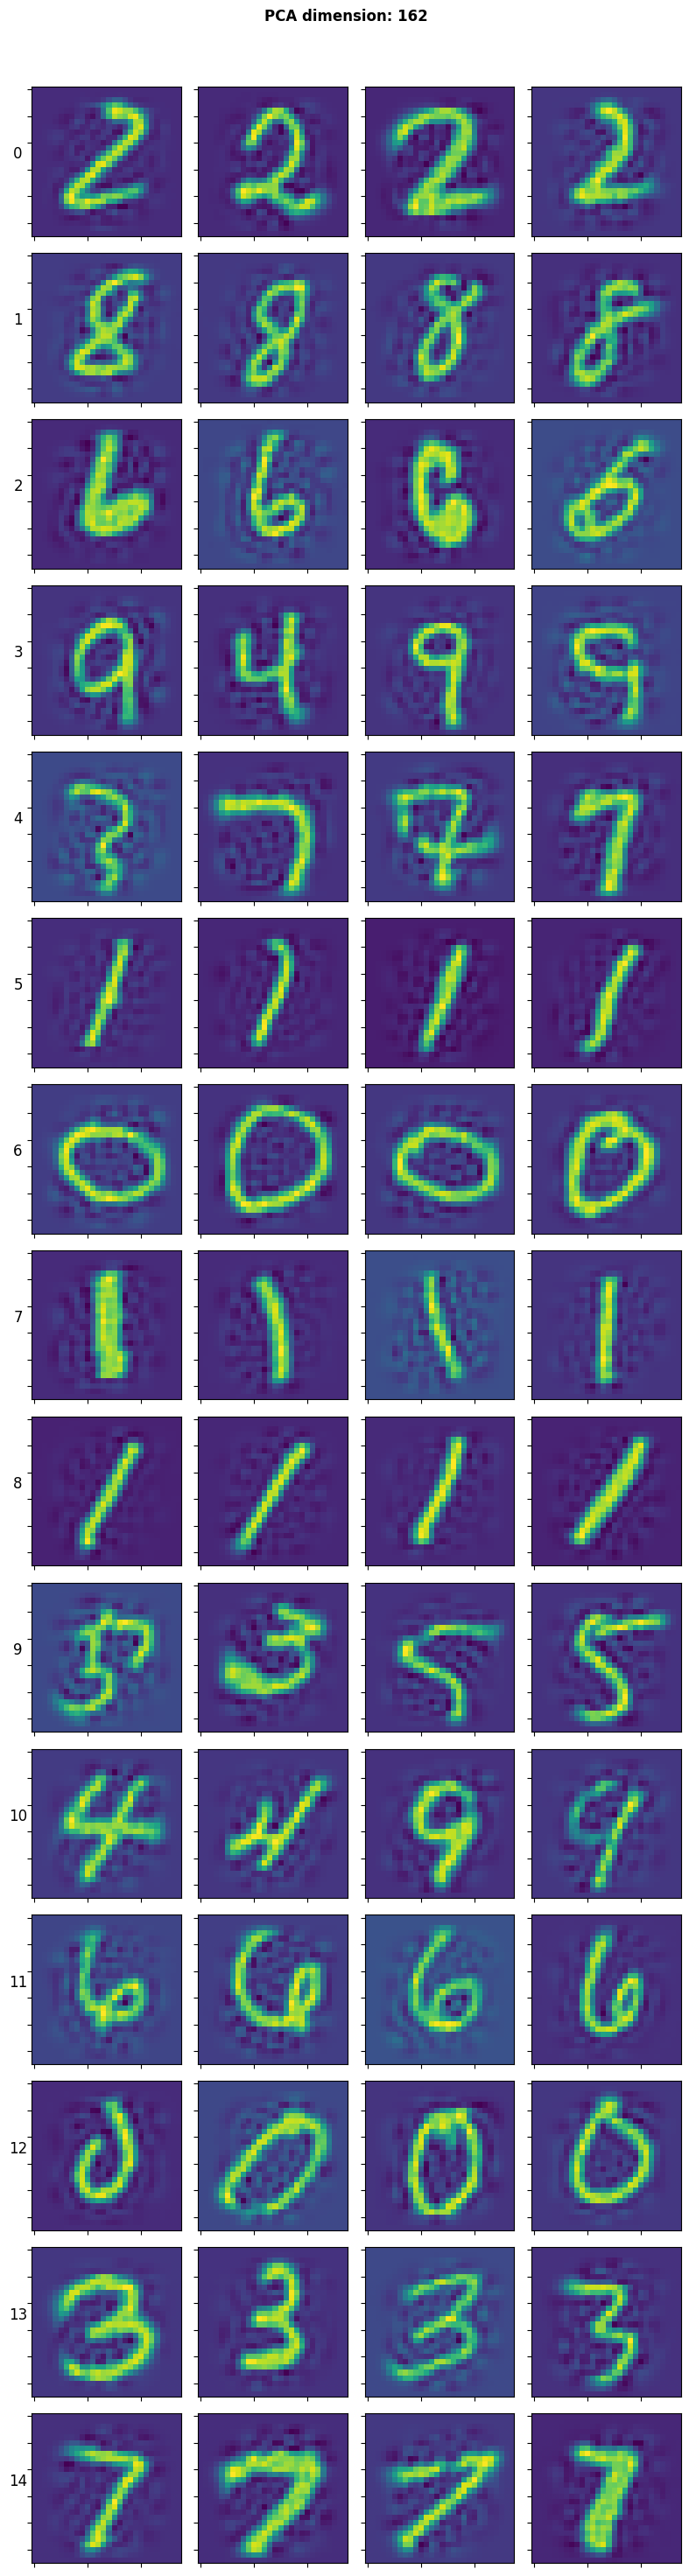

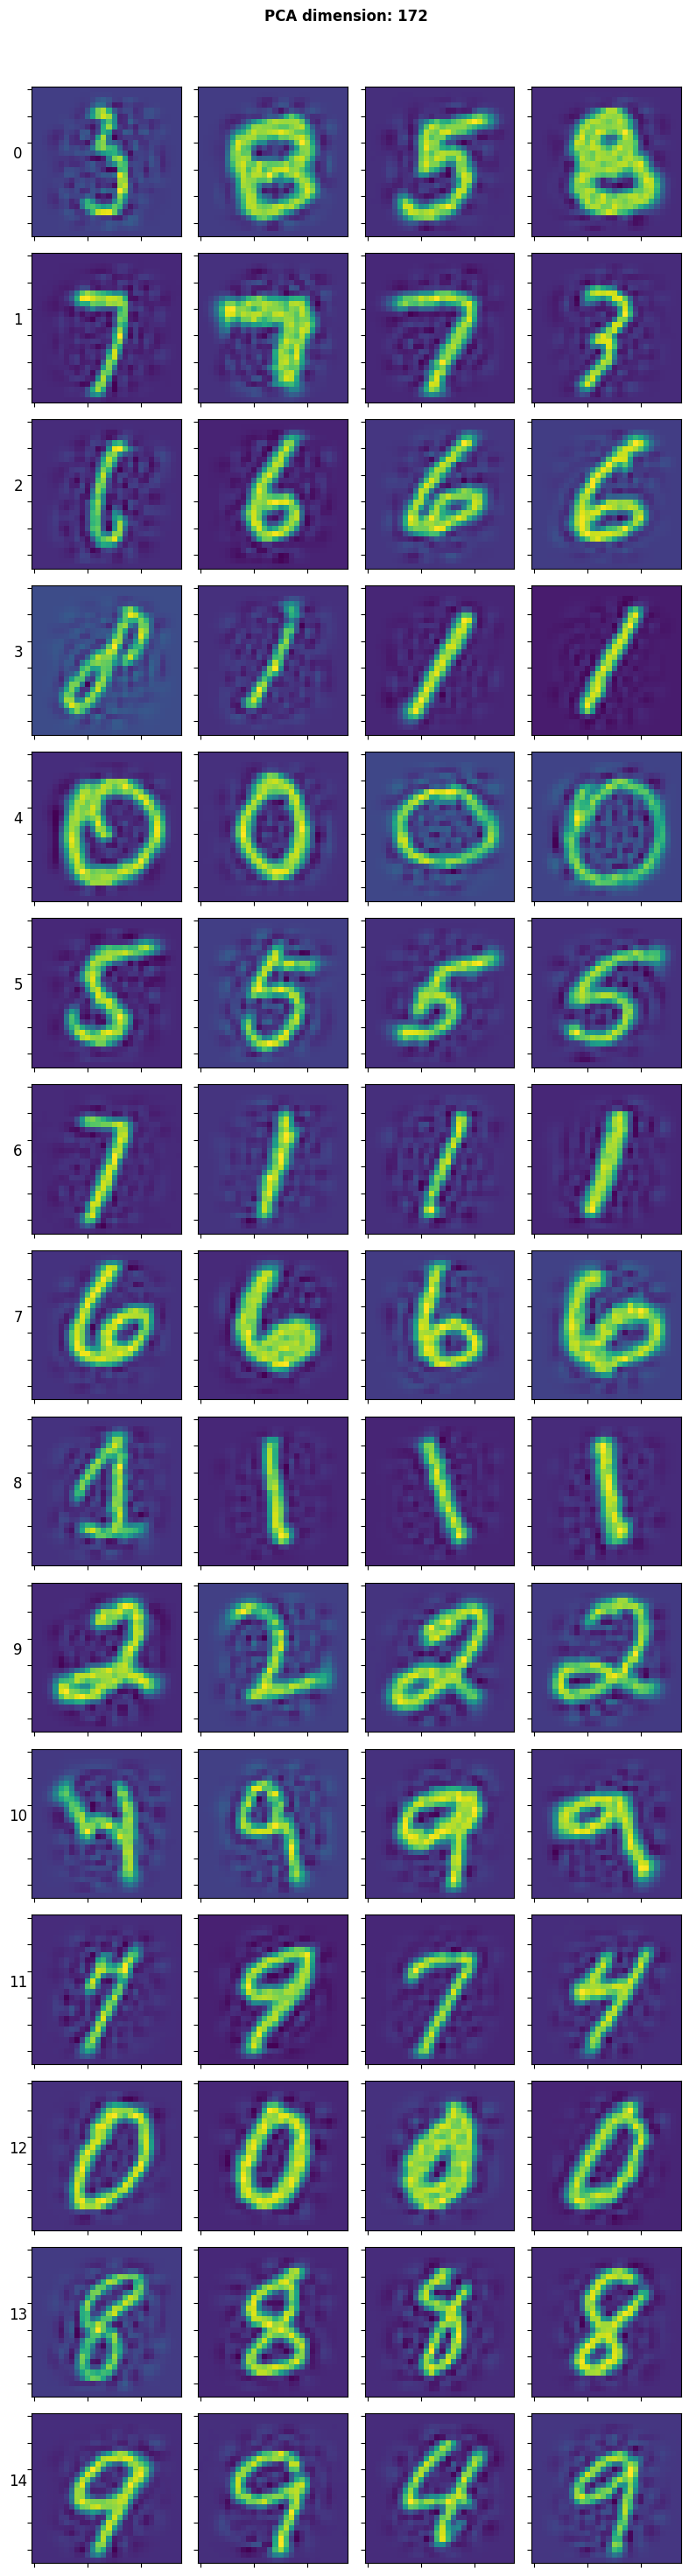

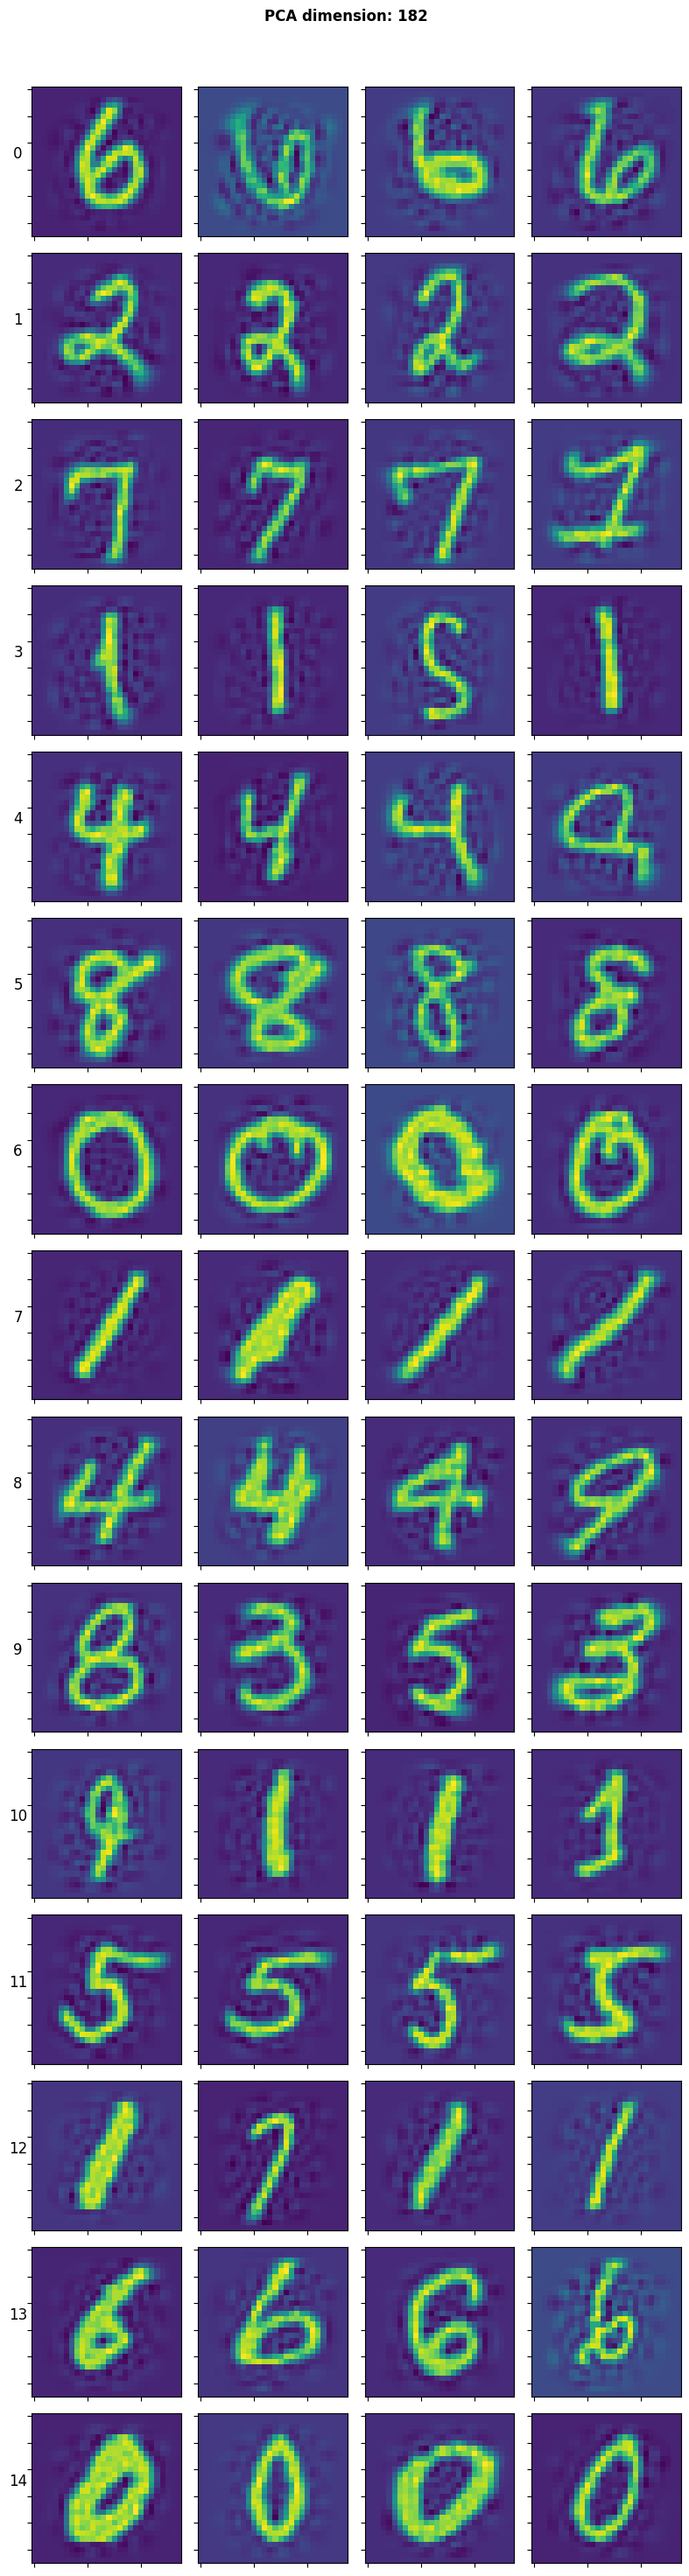

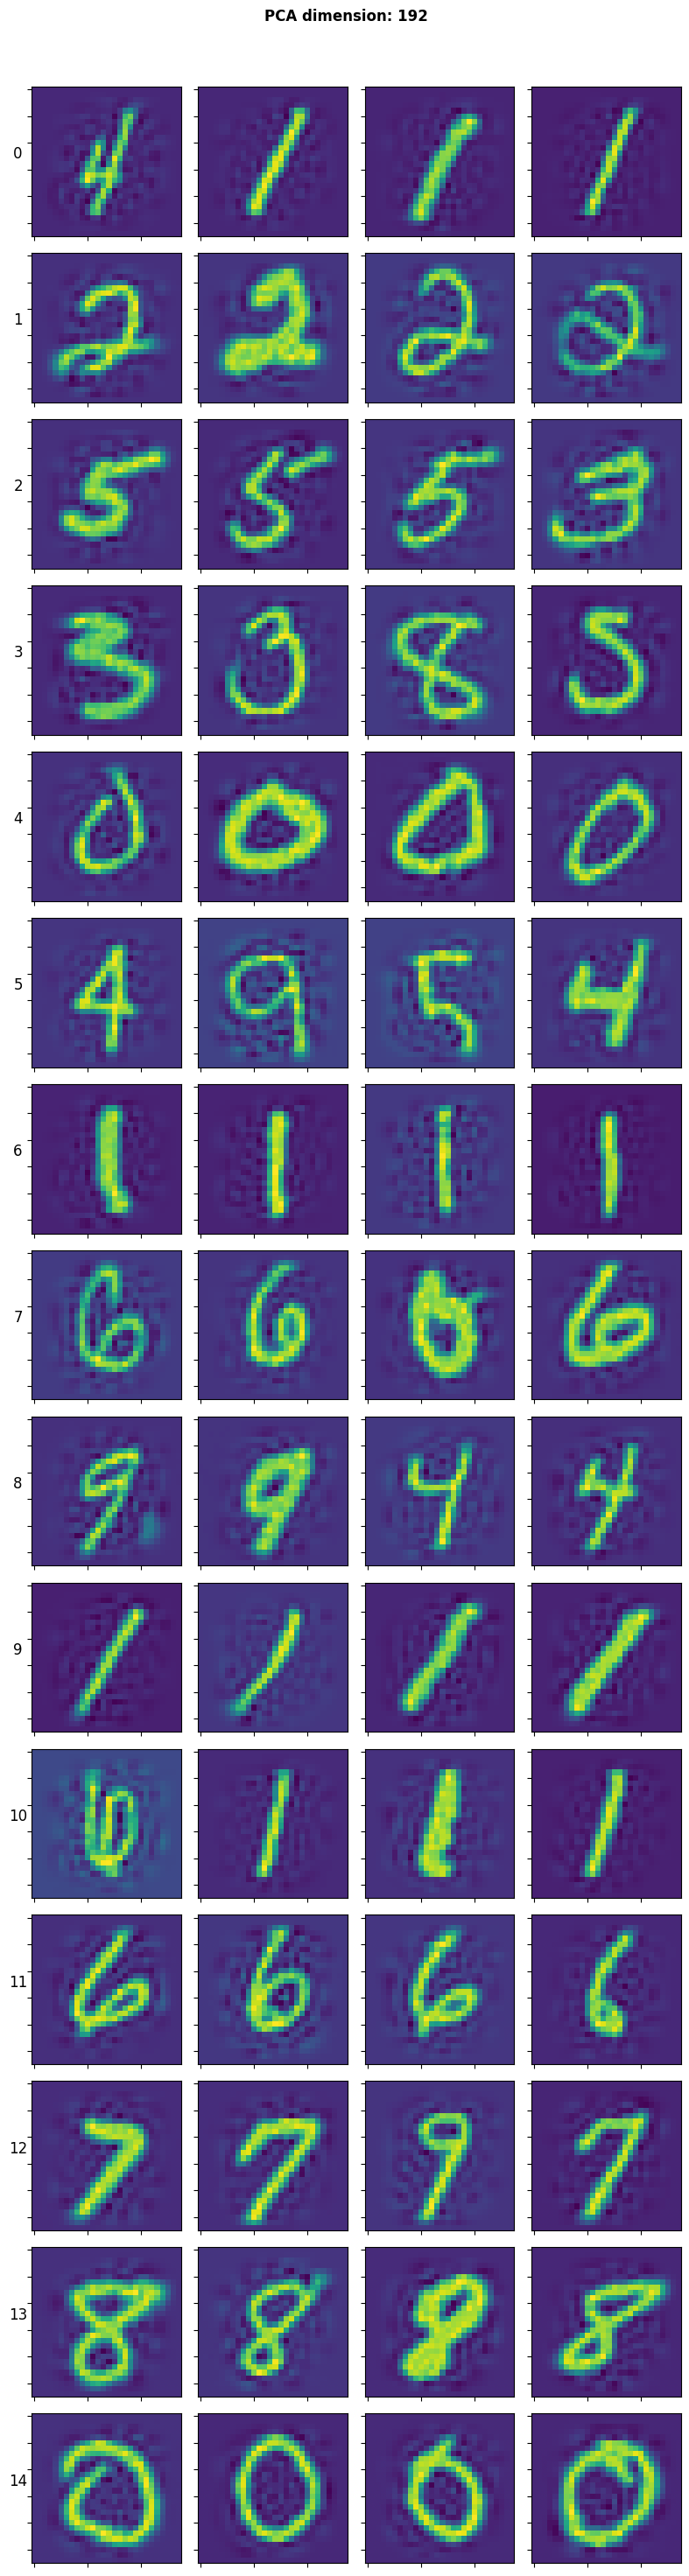

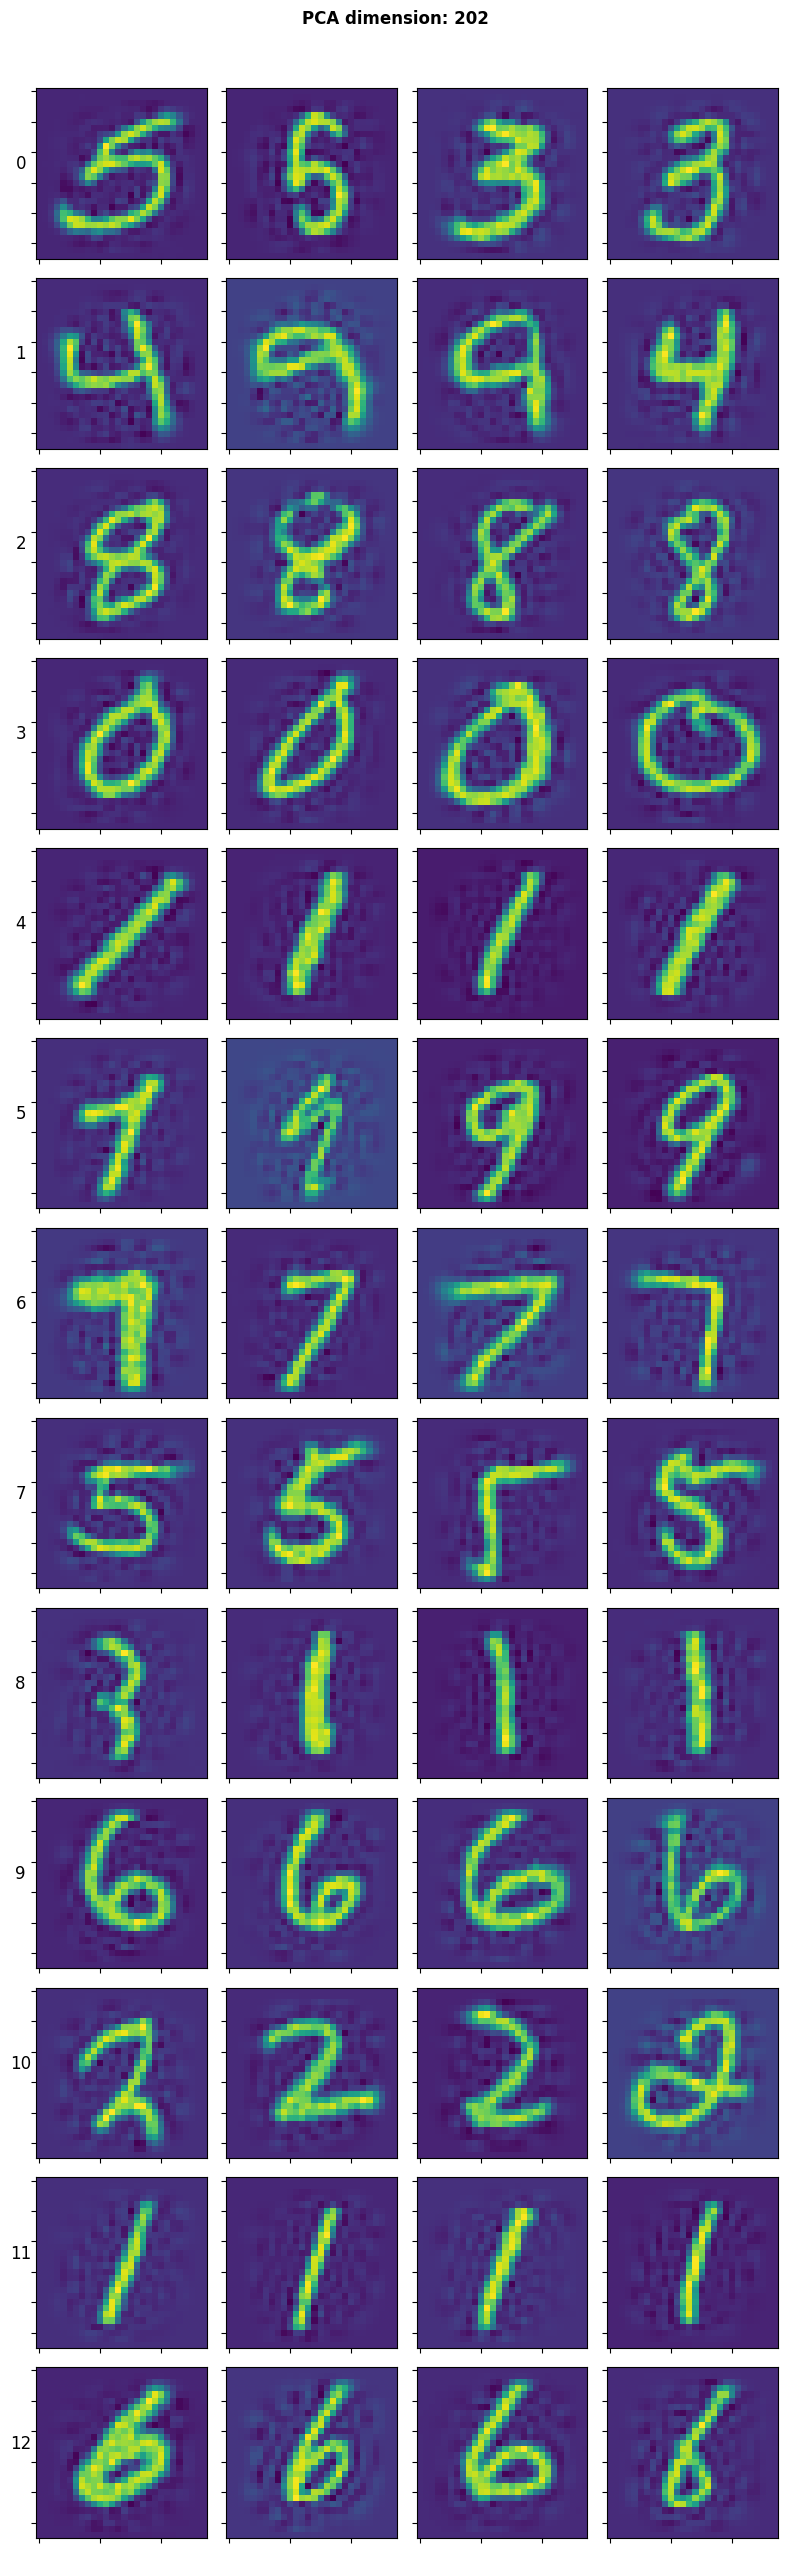

In [17]:
pca_dimensions = range(2,200+10,10)
X_test, _ = load_PCA_test_sets(200, 0.5)
i = 0

for pca_dim in pca_dimensions:
    plot_images_per_cluster(X_test, pca_dim, labels[i], n_clusters[i])
    i += 1